## Insurance Forecast using Regression models

### Different regression models that we will consider:
- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression

In [432]:
# importing libraries

import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

In [746]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [747]:
# importing the dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# viewing top 5 rows
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

## Data Cleaning and Feature Engineering

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There is no NAN in the data

In [7]:
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [8]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

<AxesSubplot:xlabel='Branch', ylabel='count'>

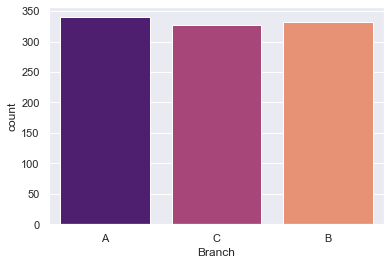

In [10]:
sns.set_theme()
sns.countplot(x = 'Branch', data = df, palette = "magma")

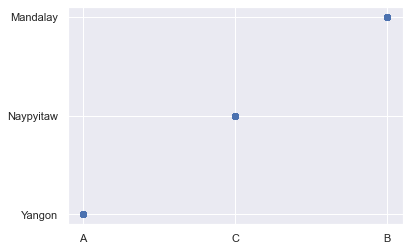

In [12]:
sns.set_theme()
plt.scatter(x = 'Branch', y = 'City', data = df)

<AxesSubplot:xlabel='Customer type', ylabel='count'>

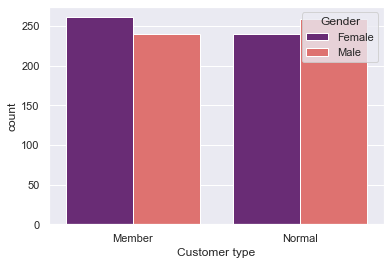

In [13]:
sns.set_theme()
sns.countplot(x = 'Customer type', data = df, hue = 'Gender', palette = "magma")

<AxesSubplot:xlabel='Product line', ylabel='Unit price'>

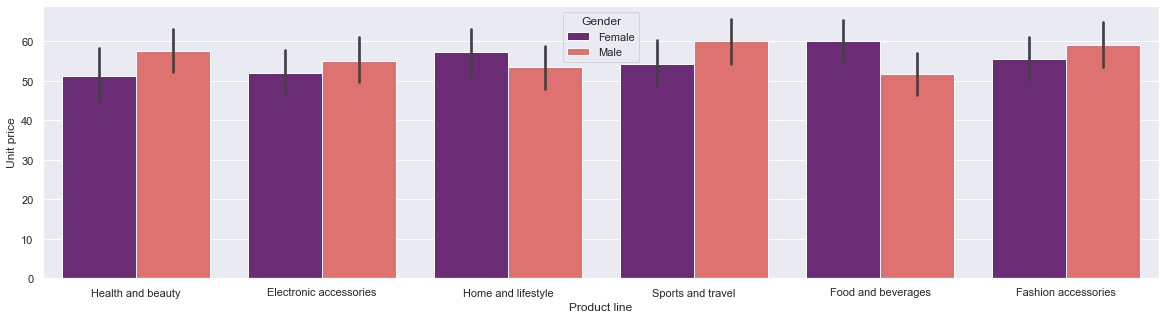

In [14]:
sns.set_theme()
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = df, palette = 'magma', hue ='Gender')

# DATA CLEANING

In [748]:
df.drop(['Invoice ID','gross margin percentage'], axis = 1, inplace = True)

In [733]:
#df.drop(['Product line'], axis = 1, inplace = True)

In [749]:
df.drop(['Branch','Tax 5%','gross income','Date','Time'], axis = 1, inplace = True)

In [541]:
df.head()

City Customer type  Gender            Product line  Unit price  \
0     Yangon        Member  Female       Health and beauty       74.69   
1  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2     Yangon        Normal    Male      Home and lifestyle       46.33   
3     Yangon        Member    Male       Health and beauty       58.22   
4     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity     Total      Payment    cogs  Rating  
0         7  548.9715      Ewallet  522.83     9.1  
1         5   80.2200         Cash   76.40     9.6  
2         7  340.5255  Credit card  324.31     7.4  
3         8  489.0480      Ewallet  465.76     8.4  
4         7  634.3785      Ewallet  604.17     5.3

In [750]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()
df['Payment']= label_encoder.fit_transform(df['Payment'])
df['Payment'].unique()
df['City']= label_encoder.fit_transform(df['City'])
df['City'].unique()
df['Customer type']= label_encoder.fit_transform(df['Customer type'])
df['Customer type'].unique()
df['Product line']= label_encoder.fit_transform(df['Customer type'])
df['Product line'].unique()


array([0, 1])

In [361]:
df.head()

City Customer type  Gender  Unit price  Quantity     Total  \
0     Yangon        Member  Female       74.69         7  548.9715   
1  Naypyitaw        Normal  Female       15.28         5   80.2200   
2     Yangon        Normal    Male       46.33         7  340.5255   
3     Yangon        Member    Male       58.22         8  489.0480   
4     Yangon        Normal    Male       86.31         7  634.3785   

       Payment    cogs  Rating  
0      Ewallet  522.83     9.1  
1         Cash   76.40     9.6  
2  Credit card  324.31     7.4  
3      Ewallet  465.76     8.4  
4      Ewallet  604.17     5.3

## Data Visualization

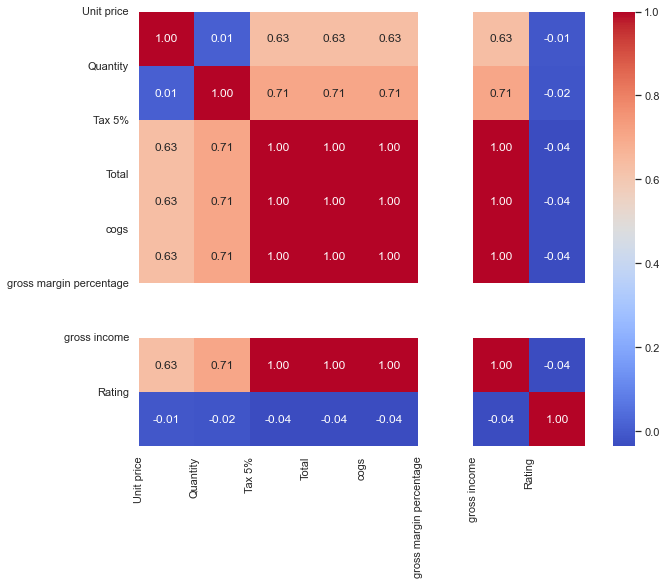

In [31]:
corr = df.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from

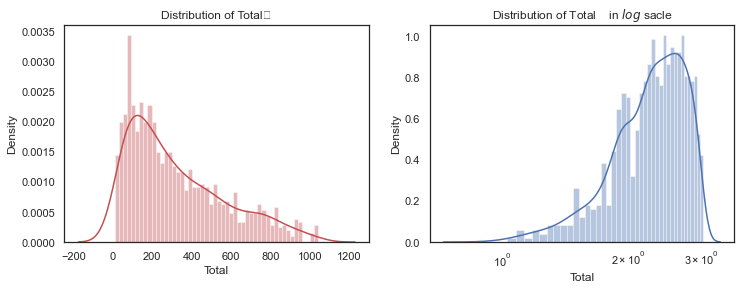

In [32]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['Total'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Total	')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['Total']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Total	 in $log$ sacle')
ax.set_xscale('log')

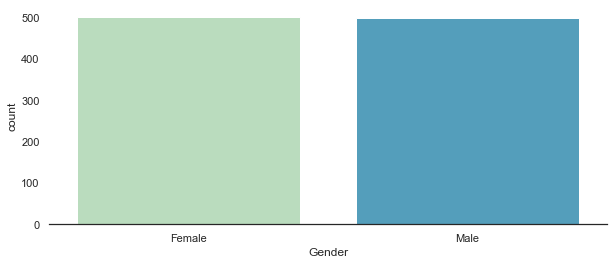

In [33]:
plt.figure(figsize=(10,4))
sns.set_style('white')
sns.countplot(x='Gender', data = df, palette='GnBu')
sns.despine(left=True)


In [118]:
df.head()

City  Customer type  Gender  Unit price  Quantity     Total  Payment  \
0     2              0       0       74.69         7  548.9715        2   
1     1              1       0       15.28         5   80.2200        0   
2     2              1       1       46.33         7  340.5255        1   
3     2              0       1       58.22         8  489.0480        2   
4     2              1       1       86.31         7  634.3785        2   

     cogs  Rating  
0  522.83     9.1  
1   76.40     9.6  
2  324.31     7.4  
3  465.76     8.4  
4  604.17     5.3

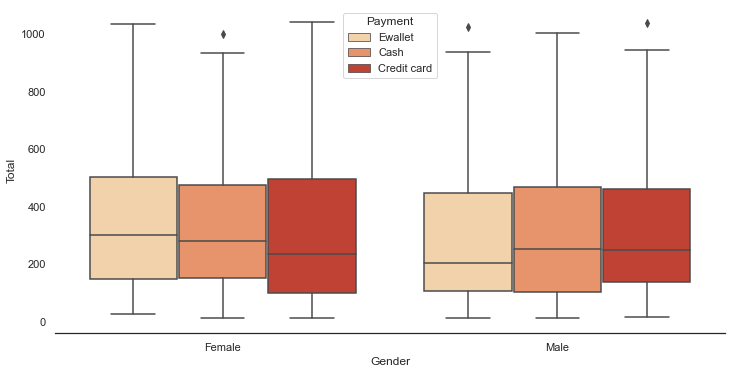

In [44]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x='Gender', y= 'Total', data = df, palette='OrRd', hue='Payment')
sns.despine(left=True)

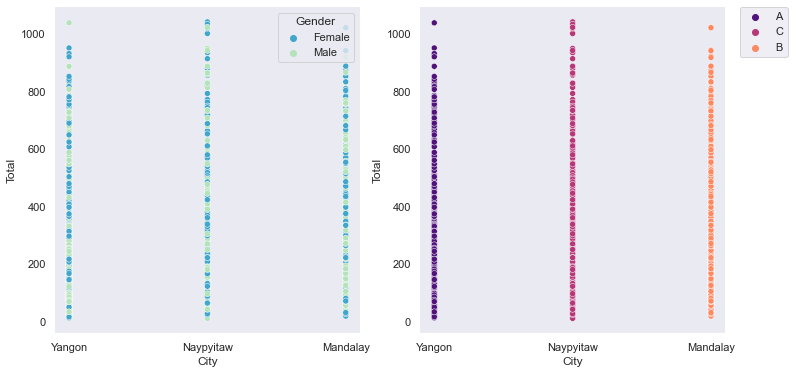

In [47]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (12,6))
sns.scatterplot(x='City', y='Total', data = df, palette='GnBu_r', hue='Gender', ax=ax[0])
sns.scatterplot(x='City', y='Total', data = df, palette='magma', hue='Branch', ax=ax[1])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Box plot of Total vs Product line')

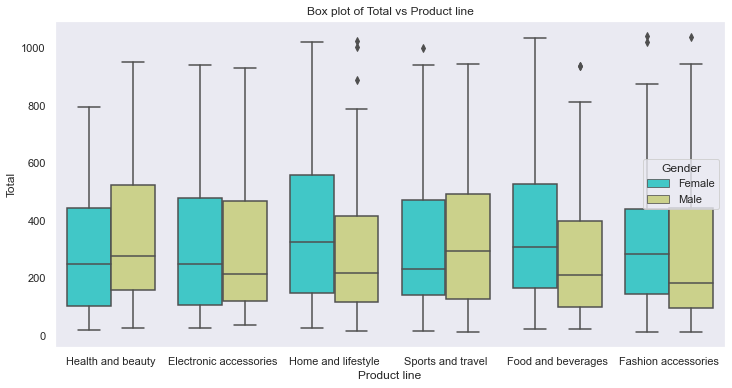

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Product line', y='Total',hue='Gender',data=df,palette='rainbow')
plt.title('Box plot of Total vs Product line')

Text(0.5, 1.0, 'Violin plot')

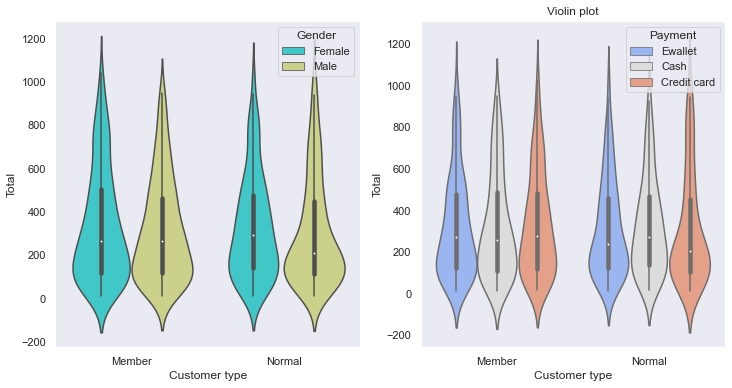

In [53]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (12,6))
sns.violinplot(x='Customer type', y='Total',hue='Gender',data=df,palette='rainbow',ax=ax[0])
sns.violinplot(x='Customer type', y='Total',hue='Payment',data=df,palette='coolwarm',ax=ax[1])
plt.title('Violin plot')

## Linear Regression

In [661]:
X=df.drop('Total', axis=1)  # independent variable
y=df['Total'] # dependent variable

In [545]:
X.head()

City  Customer type  Gender  Product line  Unit price  Quantity  Payment  \
0     2              0       0             0       74.69         7        2   
1     1              1       0             1       15.28         5        0   
2     2              1       1             1       46.33         7        1   
3     2              0       1             0       58.22         8        2   
4     2              1       1             1       86.31         7        2   

     cogs  Rating  
0  522.83     9.1  
1   76.40     9.6  
2  324.31     7.4  
3  465.76     8.4  
4  604.17     5.3

In [662]:
# splitting the dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [663]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (800, 9)
Shape of X_test:  (200, 9)
Shape of y_train:  (800,)
Shape of y_test (200,)


In [443]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Predicting Cross Validation Score of the Test set
cv_linear = cross_val_score(estimator = lr, X = X, y = y, cv = 10)

# Predicting R2 Score of the Train set 
y_pred_linear_train = lr.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score of the Test set 
y_pred_linear_test = lr.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting MAE and RMSE of the Test set 
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
mae_linear = mean_absolute_error(y_test, y_pred_linear_test)

# printing the results
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("MAE: ", mae_linear)
print("RMSE: ", rmse_linear)


CV:  1.0
R2_score (train):  1.0
R2_score (test):  1.0
MAE:  1.5837109401672933e-13
RMSE:  1.897864585228097e-13


## Polynomial Regression

In [445]:
# creating the polynomial features and the regressor model
from sklearn.preprocessing import PolynomialFeatures

ply_reg = PolynomialFeatures(degree = 2)
X_ply = ply_reg.fit_transform(X)

X_train_ply = ply_reg.fit_transform(X_train)
ply_reg.fit(X_train_ply, y_train)

regressor_ply = LinearRegression()
regressor_ply.fit(X_train_ply, y_train)

LinearRegression()

In [446]:
# Predicting Cross Validation Score of the Test set
cv_ply = cross_val_score(estimator = regressor_ply, X = X_ply, y = y, cv = 10)

# Predicting R2 Score of the Train set
y_pred_ply_train = regressor_ply.predict(ply_reg.fit_transform(X_train))
r2_score_ply_train = r2_score(y_train, y_pred_ply_train)

# Predicting R2 Score of the Test set
y_pred_ply_test = regressor_ply.predict(ply_reg.fit_transform(X_test))
r2_score_ply_test = r2_score(y_test, y_pred_ply_test)

# Predicting MAE and RMSE of the Test set
rmse_ply = (np.sqrt(mean_squared_error(y_test, y_pred_ply_test)))
mae_ply = mean_absolute_error(y_test, y_pred_ply_test)

# printing the results
print('CV: ', cv_ply.mean())
print('R2_score (train): ', r2_score_ply_train)
print('R2_score (test): ', r2_score_ply_test)
print("MAE:", mae_ply)
print("RMSE: ", rmse_ply)


CV:  1.0
R2_score (train):  1.0
R2_score (test):  1.0
MAE: 4.4490633399618675e-13
RMSE:  5.416249204622653e-13


## Ridge Regression

In [452]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import Ridge  # for ridege regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [455]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV  # for hypertuning

parameters =  {  'model__alpha' : [43],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42] 
}

regressor_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

In [456]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.9985504875467528
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [457]:
# Predicting Cross Validation Score of the Test set
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score of the Train set 
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score of the Test set
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting MAE and RMSE of the Test set
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)

# printing the results
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print('MAE:', mae_ridge)
print("RMSE: ", rmse_ridge)



CV:  0.9985504875467528
R2_score (train):  0.9989420215483171
R2_score (test):  0.9988994619643266
MAE: 6.882559926930963
RMSE:  7.859492798276316


## Lasso Regression

In [458]:
from sklearn.linear_model import Lasso  # for lasso regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [461]:

parameters =  {  'model__alpha' : [0.9949],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__max_iter' : [5000],
                'model__random_state': [42] 
}
regressor_lasso = GridSearchCV(lasso_pipe, parameters, cv=10, n_jobs = -1, verbose = 4)
regressor_lasso = regressor_lasso.fit(X, y.ravel())

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [462]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_

# Predicting R2 Score of the Train set
y_pred_lasso_train = regressor_lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score of the Test set
y_pred_lasso_test = regressor_lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting MAE and RMSE pf the Test set
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)

# printing the results
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print('MAE:', mae_lasso)
print("RMSE: ", rmse_lasso)


CV:  0.9999832986760255
R2_score (train):  0.9999836095985383
R2_score (test):  0.9999835712994823
MAE: 0.7902996562102916
RMSE:  0.9602705244096768


##  Support Vector Regression

In [463]:
from sklearn.svm import SVR # for support vector regression

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.values.reshape(-1,1))

In [464]:
# Creating the SVR regressor
svr_reg = SVR()

In [466]:
# Applying Grid Search to find the best model and the best parameters
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

svr_reg = GridSearchCV(estimator = svr_reg,
                           param_grid = parameters,
                           cv = 10,
                           verbose = 4,
                           
                           n_jobs = -1)
svr_reg = svr_reg.fit(X_scaled, y_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [467]:
print(svr_reg.best_params_)
print(svr_reg.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid', 'tol': 0.0001}
0.9984638032043989


In [468]:
# Predicting Cross Validation Score
cv_svr = svr_reg.best_score_

# Predicting R2 Score of the Train set
y_pred_svr_train = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_train)))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score of the Test set
y_pred_svr_test = sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting MAE and RMSE of the Test set 
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
mae_svr = mean_absolute_error(y_test, y_pred_svr_test)

# printing the results
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print('MAE:', mae_svr)
print("RMSE: ", rmse_svr)


CV:  0.9984638032043989
R2_score (train):  0.9986708053833662
R2_score (test):  0.9982464550650815
MAE: 7.509910909196623
RMSE:  9.920885596509658


## Decision Tree Regression

In [469]:
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression

In [470]:
# Creating the Decision Tree regressor
dt_reg = DecisionTreeRegressor(random_state = 42)

In [472]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "max_depth": np.arange(1,21),
              "min_samples_leaf": [1, 5, 10, 20, 50, 100],
              "min_samples_split": np.arange(2, 11),
              "criterion": ["mse"],
              "random_state" : [42]}
            ]

dt_reg = GridSearchCV(estimator = dt_reg,
                           param_grid  = parameters,
                           cv = 10,
                           verbose = 4,
                           
                           n_jobs = -1)
dt_reg = dt_reg.fit(X_scaled, y_scaled)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
[CV 4/10] END model__alpha=0.9949, model__fit_intercept=True, model__max_iter=5000, model__random_state=42, model__tol=0.0001;, score=1.000 total time=   0.0s
[CV 1/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.220 total time=   0.1s
[CV 10/10] END C=0.001, gamma=0.001, kernel=rbf, tol=0.0001;, score=-0.073 total time=   0.1s
[CV 1/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.172 total time=   0.1s
[CV 2/10] END C=0.001, gamma=0.01, kernel=rbf, tol=0.0001;, score=-0.228 total time=   0.1s
[CV 7/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.040 total time=   0.1s
[CV 8/10] END C=0.001, gamma=0.01, kernel=sigmoid, tol=0.0001;, score=-0.078 total time=   0.1s
[CV 1/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.221 total time=   0.1s
[CV 2/10] END C=0.001, gamma=1, kernel=rbf, tol=0.0001;, score=-0.281 total time=   0.1s
[CV 3/10] END C=0.001, gamma=1, k

[CV 8/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=10, random_state=42;, score=0.777 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=10, random_state=42;, score=0.700 total time=   0.0s
[CV 10/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=10, random_state=42;, score=0.732 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=1, min_samples_leaf=50, min_samples_split=2, random_state=42;, score=0.736 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=1, min_samples_leaf=50, min_samples_split=2, random_state=42;, score=0.687 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=1, min_samples_leaf=50, min_samples_split=2, random_state=42;, score=0.737 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=1, min_samples_leaf=50, min_samples_split=2, random_state=42;, score=0.633 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=1, min_samples_leaf=50, mi

[CV 10/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=5, random_state=42;, score=0.732 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=6, random_state=42;, score=0.736 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=6, random_state=42;, score=0.687 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=6, random_state=42;, score=0.737 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=6, random_state=42;, score=0.633 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=6, random_state=42;, score=0.720 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_samples_split=6, random_state=42;, score=0.731 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=1, min_samples_leaf=20, min_s

[CV 5/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=0.999 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=0.999 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=0.999 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=0.999 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=0.998 total time=   0.0s
[CV 10/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=0.999 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_split=5, random_state=42;, score=0.999 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=5, min_samples_leaf=1, min_samples_s

[CV 4/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=4, random_state=42;, score=0.994 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=4, random_state=42;, score=0.997 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=4, random_state=42;, score=0.995 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=4, random_state=42;, score=0.995 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=4, random_state=42;, score=0.995 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=4, random_state=42;, score=0.998 total time=   0.0s
[CV 10/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=4, random_state=42;, score=0.996 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=5, min_samples_leaf=20, min_s

[CV 10/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=7, random_state=42;, score=0.996 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.997 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.997 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.998 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.994 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.997 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.995 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=7, min_samples_leaf=20, min_s

[CV 6/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=42;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_split=5, random_state=42;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=8, min_samples_leaf=1, min_samples_s

[CV 2/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_samples_split=9, random_state=42;, score=0.986 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_samples_split=9, random_state=42;, score=0.990 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_samples_split=9, random_state=42;, score=0.984 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_samples_split=9, random_state=42;, score=0.990 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_samples_split=9, random_state=42;, score=0.986 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_samples_split=9, random_state=42;, score=0.988 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_samples_split=9, random_state=42;, score=0.986 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=9, min_samples_leaf=50, min_sa

[CV 2/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=9, min_samples_leaf=1, min_samples_sp

[CV 5/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_samples_split=4, random_state=42;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_samples_split=5, random_state=42;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=12, min_samples_leaf=1, min_s

[CV 10/10] END criterion=mse, max_depth=11, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.996 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=11, min_samples_leaf=20, min_samples_split=9, random_state=42;, score=0.997 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=11, min_samples_leaf=20, min_samples_split=9, random_state=42;, score=0.997 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=11, min_samples_leaf=20, min_samples_split=9, random_state=42;, score=0.998 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=11, min_samples_leaf=20, min_samples_split=9, random_state=42;, score=0.994 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=13, min_samples_leaf=5, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=13, min_samples_leaf=5, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=13, min_samples_leaf=5, 

[CV 4/10] END criterion=mse, max_depth=15, min_samples_leaf=100, min_samples_split=5, random_state=42;, score=0.954 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=15, min_samples_leaf=100, min_samples_split=5, random_state=42;, score=0.959 total time=   0.0s
[CV 6/10] END criterion=mse, max_depth=15, min_samples_leaf=100, min_samples_split=5, random_state=42;, score=0.950 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=15, min_samples_leaf=100, min_samples_split=5, random_state=42;, score=0.950 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=15, min_samples_leaf=100, min_samples_split=5, random_state=42;, score=0.970 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=16, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.998 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=16, min_samples_leaf=20, min_samples_split=8, random_state=42;, score=0.994 total time=   0.0s
[CV 5/10] END criterion=mse, max_depth=16, min_samples_le

[CV 6/10] END criterion=mse, max_depth=16, min_samples_leaf=100, min_samples_split=3, random_state=42;, score=0.950 total time=   0.0s
[CV 7/10] END criterion=mse, max_depth=16, min_samples_leaf=100, min_samples_split=3, random_state=42;, score=0.950 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=16, min_samples_leaf=100, min_samples_split=3, random_state=42;, score=0.970 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=16, min_samples_leaf=100, min_samples_split=3, random_state=42;, score=0.956 total time=   0.0s
[CV 10/10] END criterion=mse, max_depth=16, min_samples_leaf=100, min_samples_split=3, random_state=42;, score=0.957 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=16, min_samples_leaf=100, min_samples_split=4, random_state=42;, score=0.955 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=16, min_samples_leaf=100, min_samples_split=4, random_state=42;, score=0.948 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=16, min_samples

[CV 7/10] END criterion=mse, max_depth=17, min_samples_leaf=5, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 8/10] END criterion=mse, max_depth=17, min_samples_leaf=5, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 9/10] END criterion=mse, max_depth=17, min_samples_leaf=5, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 10/10] END criterion=mse, max_depth=17, min_samples_leaf=5, min_samples_split=9, random_state=42;, score=1.000 total time=   0.0s
[CV 1/10] END criterion=mse, max_depth=17, min_samples_leaf=5, min_samples_split=10, random_state=42;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=mse, max_depth=17, min_samples_leaf=5, min_samples_split=10, random_state=42;, score=1.000 total time=   0.0s
[CV 3/10] END criterion=mse, max_depth=17, min_samples_leaf=5, min_samples_split=10, random_state=42;, score=1.000 total time=   0.0s
[CV 4/10] END criterion=mse, max_depth=17, min_samples_leaf=5, mi

In [473]:
print(dt_reg.best_params_)
print(dt_reg.best_score_)

{'criterion': 'mse', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}
0.9999300197463526


In [474]:
# Predicting Cross Validation Score
cv_dt = dt_reg.best_score_

# Predicting R2 Score of the Train set 
y_pred_dt_train = sc_y.inverse_transform(dt_reg.predict(sc_X.transform(X_train)))
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score of the Test set 
y_pred_dt_test = sc_y.inverse_transform(dt_reg.predict(sc_X.transform(X_test)))
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting MAE and RMSE of the Test set
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
mae_dt = mean_absolute_error(y_test, y_pred_dt_test)

# printing the results
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("MAE:", mae_dt)
print("RMSE: ", rmse_dt)


CV:  0.9999300197463526
R2_score (train):  0.999998196839638
R2_score (test):  0.9999977682350966
MAE: 0.1441650000000019
RMSE:  0.353929052742219


## Random Forest Regression

In [475]:
from sklearn.ensemble import RandomForestRegressor # for random forest regression

In [476]:
# Creating the Random Forest regressor
rf_reg = RandomForestRegressor()

In [477]:
# Applying GridSearch to find the best model and the best parameters
parameters =  { "n_estimators": [1200],
                "max_features": ["auto"],
                "max_depth": [50],
                "min_samples_split": [7],
                "min_samples_leaf": [10],
                "bootstrap": [True],
                "criterion": ["mse"],
                "random_state" : [42] }
            
rf_reg = GridSearchCV(estimator = rf_reg,
                                  param_grid = parameters,
                                  cv = 10,
                                # verbose = 4,
                                  n_jobs = -1)
rf_reg = rf_reg.fit(X_scaled, y.ravel())

In [478]:
print(rf_reg.best_params_)
print(rf_reg.best_score_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
0.9993120196452171


In [479]:
# Predicting Cross Validation Score
cv_rf = rf_reg.best_score_

# Predicting R2 Score of the Train Set
y_pred_rf_train = rf_reg.predict(sc_X.transform(X_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score of the Test set 
y_pred_rf_test = rf_reg.predict(sc_X.transform(X_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting MAE and RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
mae_rf = mean_absolute_error(y_test, y_pred_rf_test)

# printing the results
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print('MAE:', mae_rf)
print("RMSE: ", rmse_rf)

CV:  0.9993120196452171
R2_score (train):  0.9995409939193157
R2_score (test):  0.9994906837007937
MAE: 1.9148578073822995
RMSE:  5.3466995386169485


In [480]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression', rmse_ply, r2_score_ply_train, r2_score_ply_test, cv_ply.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [481]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

Model          RMSE  R2_Score(training)  \
0          Linear Regression  1.897865e-13            1.000000   
1      Polynomial Regression  5.416249e-13            1.000000   
2           Ridge Regression  7.859493e+00            0.998942   
3           Lasso Regression  9.602705e-01            0.999984   
4  Support Vector Regression  9.920886e+00            0.998671   
5   Decision Tree Regression  3.539291e-01            0.999998   
6   Random Forest Regression  5.346700e+00            0.999541   

   R2_Score(test)  Cross-Validation  
0        1.000000          1.000000  
1        1.000000          1.000000  
2        0.998899          0.998550  
3        0.999984          0.999983  
4        0.998246          0.998464  
5        0.999998          0.999930  
6        0.999491          0.999312

### Visualizing model performance

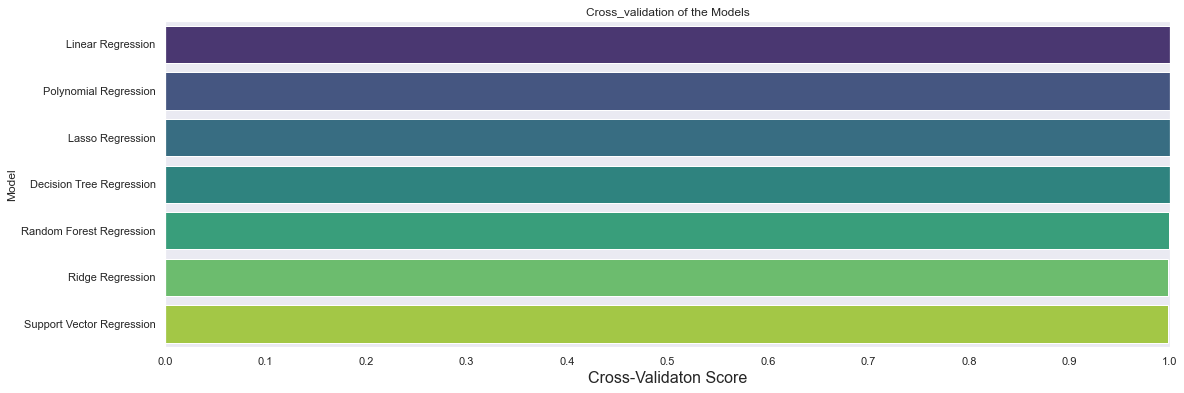

In [482]:
# comaprison of cross-validation between the models

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')

axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.title('Cross_validation of the Models')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

Text(0.5, 0, 'Predict')

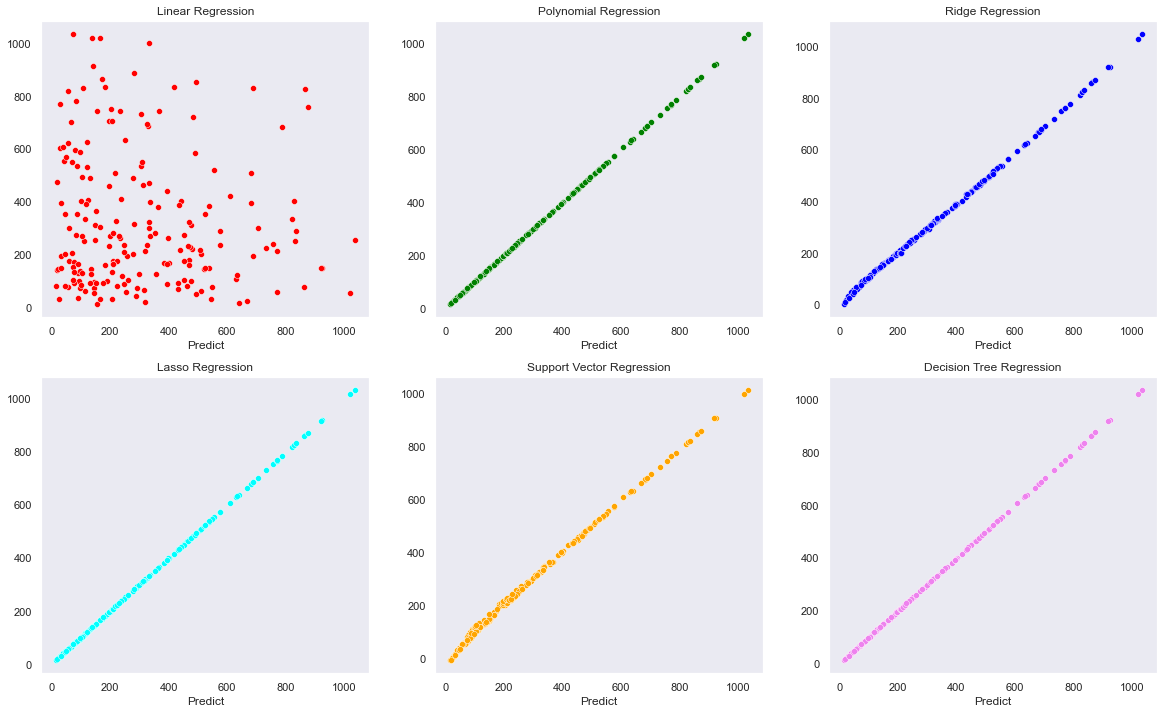

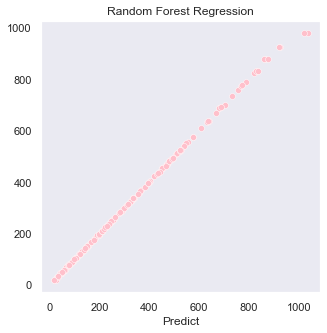

In [483]:
# comparison of R-square between the models
fig, ax = plt.subplots(2,3, figsize=(20,12))
sns.set_style('dark')
g = sns.scatterplot(y_test, y_pred_linear_test, ax=ax[0,0], color='red')
g.set_title('Linear Regression')
g.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ply_test, ax=ax[0,1], color='green')
h.set_title('Polynomial Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ridge_test, ax=ax[0,2], color='blue')
h.set_title('Ridge Regression')
h.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_lasso_test, ax=ax[1,0], color='cyan')
h.set_title('Lasso Regression')
h.set_xlabel('Predict')

sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_svr_test, ax=ax[1,1], color='orange')
h.set_title('Support Vector Regression')
h.set_xlabel('Predict')

sns.set_style('dark')
f = sns.scatterplot(y_test, y_pred_dt_test, ax=ax[1,2], color='violet')
f.set_title('Decision Tree Regression')
f.set_xlabel('Predict')

plt.figure(figsize=(5,5))
sns.set_style('dark')
f = sns.scatterplot(y_test, y_pred_rf_test, color='pink')
f.set_title('Random Forest Regression')
f.set_xlabel('Predict')

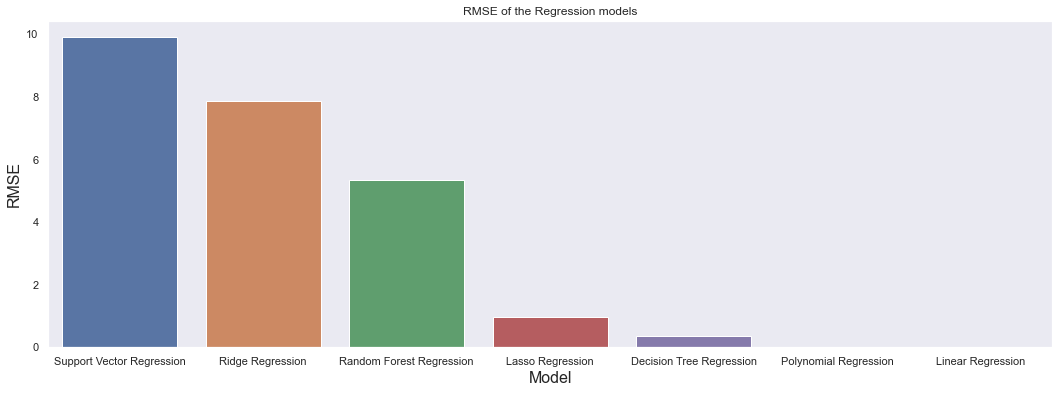

In [484]:
# comparison of RMSE between the models

predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)
plt.title('RMSE of the Regression models')
plt.show()

In [548]:
X.head()

City  Customer type  Gender  Product line  Unit price  Quantity  Payment  \
0     2              0       0             0       74.69         7        2   
1     1              1       0             1       15.28         5        0   
2     2              1       1             1       46.33         7        1   
3     2              0       1             0       58.22         8        2   
4     2              1       1             1       86.31         7        2   

     cogs  Rating  
0  522.83     9.1  
1   76.40     9.6  
2  324.31     7.4  
3  465.76     8.4  
4  604.17     5.3

In [ ]:
Total = df['Total']
df = df[['City','Customer type','Gender','Product line','Unit price','Quantity'
             ,'Payment','cogs']]
df['Total'] = total
df.corr()['Total'].sort_values(ascending=False)

#### Checking with respect to Unit Price

In [100]:
up=X['Unit price']

In [101]:
up.head()

0    74.69
1    15.28
2    46.33
3    58.22
4    86.31
Name: Unit price, dtype: float64

In [102]:
up.describe()

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64

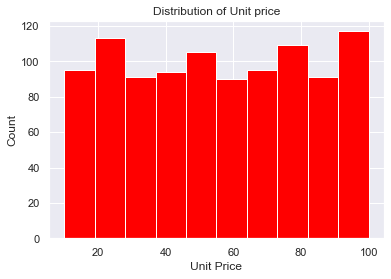

In [103]:
up.hist(color = "red", edgecolor = "white")
plt.xlabel('Unit Price'); plt.ylabel('Count');
plt.title('Distribution of Unit price');

In [113]:
def view_distribution(data):
    az.plot_kde(data, rug=True)
    return plt.yticks([0], alpha=0)

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py:955: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: non-precise type pyobject
During: typing of argument at /opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py (977)

File "../../../../opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py", line 977:
def histogram(data, bins, range_hist=None):
    <source elided>
    """
    hist, bin_edges = np.histogram(data, bins=bins, range=range_hist)
    ^

  @conditional_jit(cache=True)
/opt/anaconda3/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "histogram" was compiled in object mode without forceobj=True.

File "../../../../opt/anaconda3/lib/python3.9/site-packages/arviz/stats/density_utils.py", line 956:
@conditional_jit(cache=True)
def histogram(data, bins, range_hist=None):
^

  warnings.warn(erro

([<matplotlib.axis.YTick at 0x7fee18197730>], [Text(0, 0, '')])

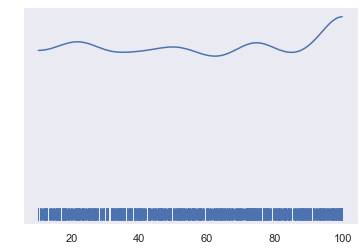

In [119]:
view_distribution(df['Unit price'])

In [108]:
import pymc3 as pm

In [121]:
with pm.Model() as model_up:
    mu = pm.Normal('mu', 0, 1)
    # sigma = 1.0
    sigma = pm.HalfNormal('sigma', sd=2.0)

    #predictive = pm.Normal('predictive', mu=mu, sd=sigma)
    returns = pm.Uniform('returns', lower=0, upper=100, observed=y)

    step = pm.NUTS()
    trace = pm.sample(50000, chains=2, step=step, tune=2000, progressbar=True)
    burned_trace = trace[300::]

/var/folders/1x/hsffh9g97bl3r14dc52jynvr0000gn/T/ipykernel_26726/3189850407.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(50000, chains=2, step=step, tune=2000, progressbar=True)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 2_000 tune and 50_000 draw iterations (4_000 + 100_000 draws total) took 23 seconds.
There were 94 divergences after tuning. Increase `target_accept` or reparameterize.
There were 317 divergences after tuning. Increase `target_accept` or reparameterize.


In [110]:
import arviz as az


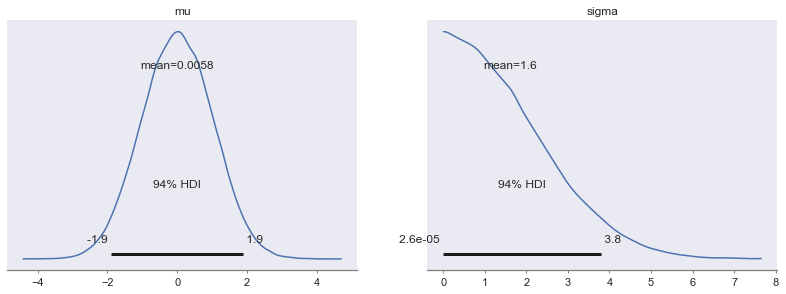

In [128]:
with model_up:
    az.plot_posterior(burned_trace);

In [131]:
with model_up:
    ppc = pm.sample_posterior_predictive(
        trace, var_names=["mu", "sigma", "returns"], random_seed=60
    )

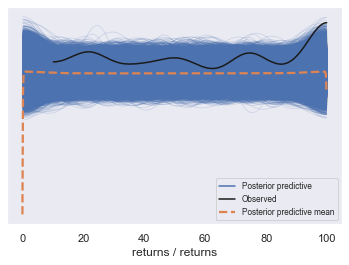

In [132]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model_up));

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


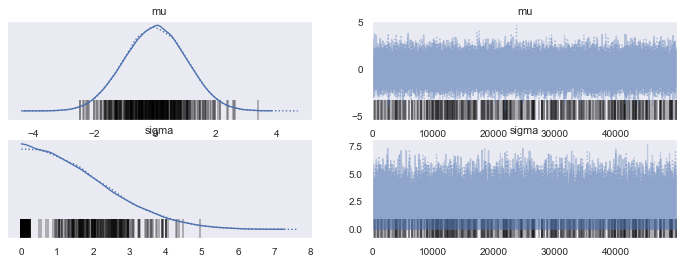

In [124]:
az.plot_trace(trace);

In [528]:
total=y

In [637]:
def graphss(trace):
    pm.traceplot(trace)
    az.plot_trace(trace)
    az.plot_posterior(trace)
    
    

In [532]:
import pymc3 as pm

X_up = up

with pm.Model() as model_unitprice:
    a = pm.Uniform('a', 0, 6)
    b = pm.Uniform('b', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_pred = a * X_up + b
    y = pm.Normal('y', mu=y_pred, sd=sigma, observed=total)
    step=pm.Metropolis()
    trace = pm.sample(1000, chains=2, step=step, tune=2000, progressbar=True)
    trace_up = trace[300::]
    

/var/folders/1x/hsffh9g97bl3r14dc52jynvr0000gn/T/ipykernel_26726/3435722896.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, chains=2, step=step, tune=2000, progressbar=True)
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [b]
>Metropolis: [a]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


/var/folders/1x/hsffh9g97bl3r14dc52jynvr0000gn/T/ipykernel_26726/2269743170.py:2: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less u

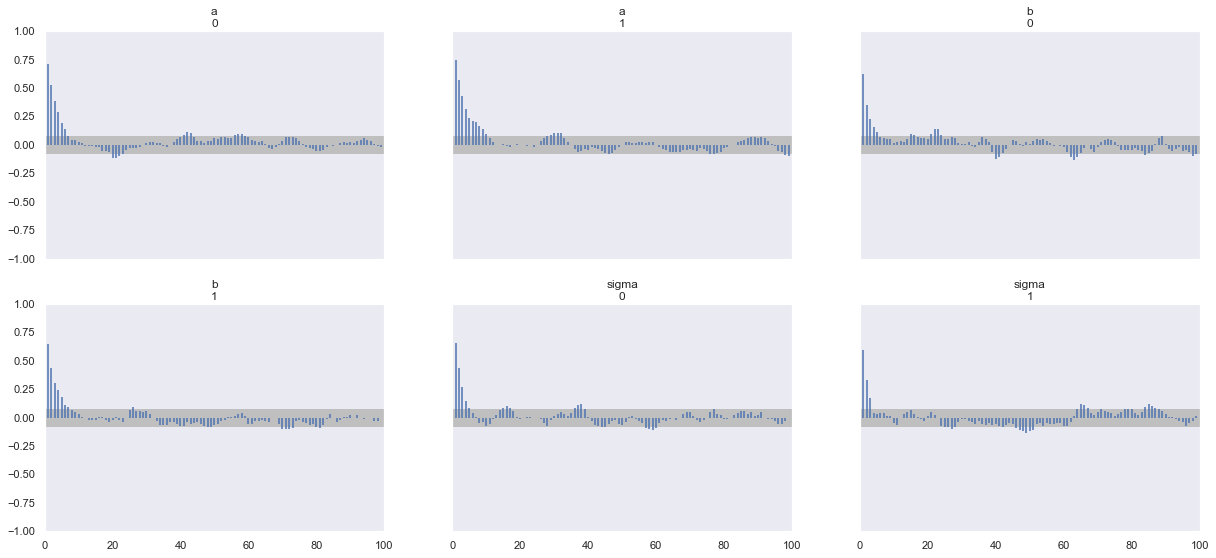

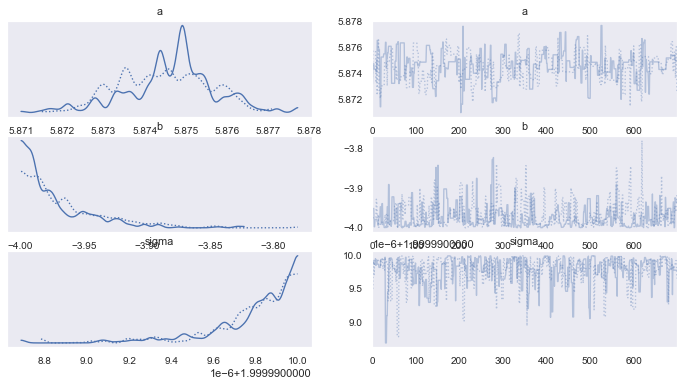

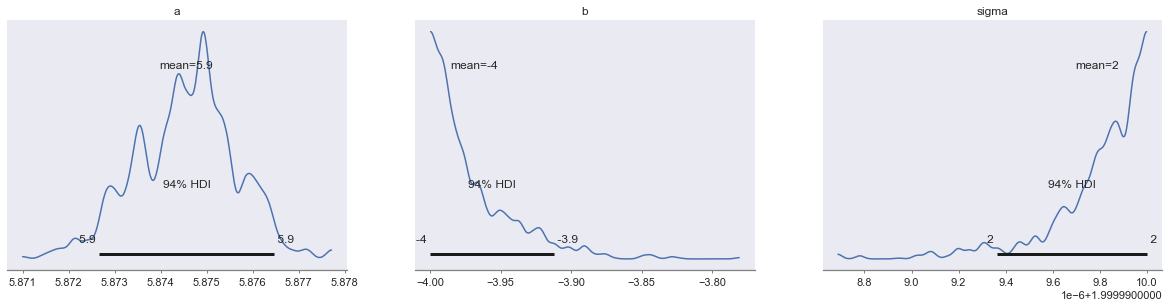

In [534]:
graphss(trace_up)

In [535]:
pm.summary(trace_up)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a      5.875  0.001   5.873    5.876      0.000    0.000     211.0     245.0   
b     -3.969  0.031  -4.000   -3.912      0.002    0.001     211.0     305.0   
sigma  2.000  0.000   2.000    2.000      0.000    0.000     303.0     278.0   

       r_hat  
a       1.01  
b       1.02  
sigma   1.00

In [554]:
X_up = up

with pm.Model() as model_unitprice_nuts:
    a = pm.Uniform('a', 0, 6)
    b = pm.Uniform('b', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_pred = a * X_up + b
    y = pm.Normal('y', mu=y_pred, sd=sigma, observed=total)
    step=pm.NUTS()
    trace = pm.sample(1000, chains=2, step=step, tune=2000, progressbar=True)
    trace_up_nuts = trace[300::]

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 14 seconds.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


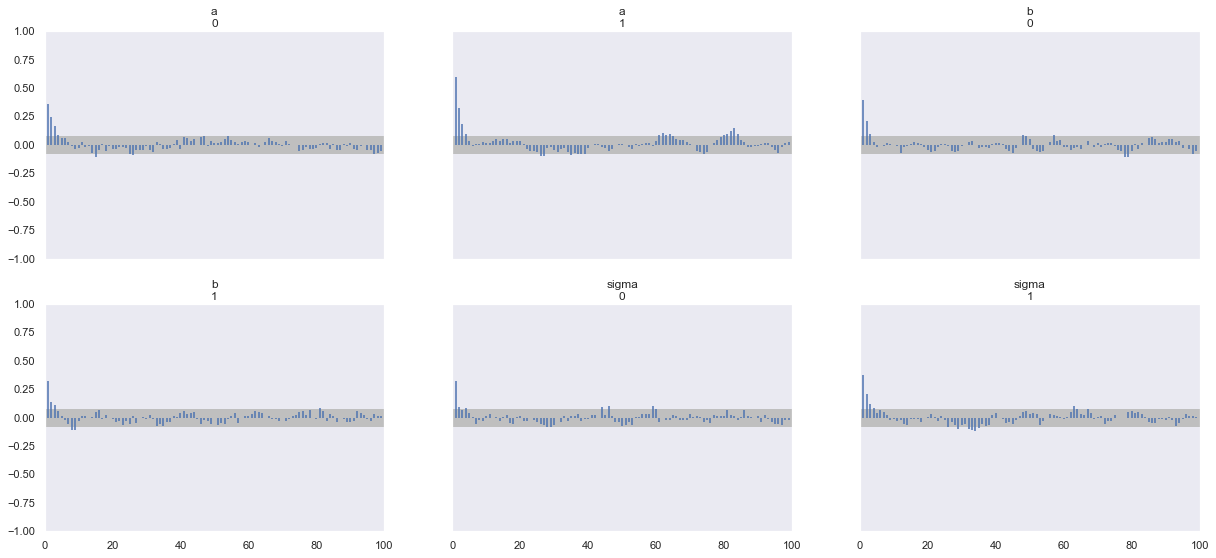

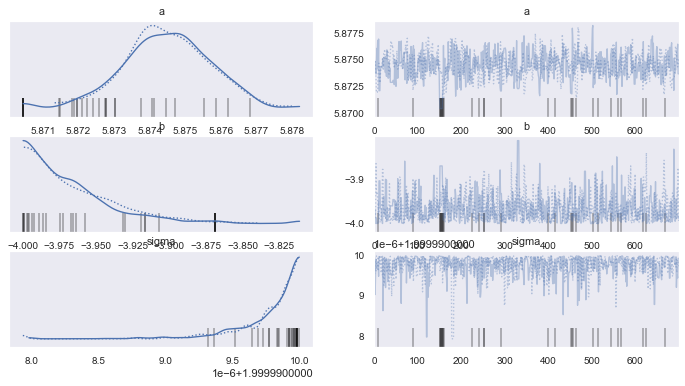

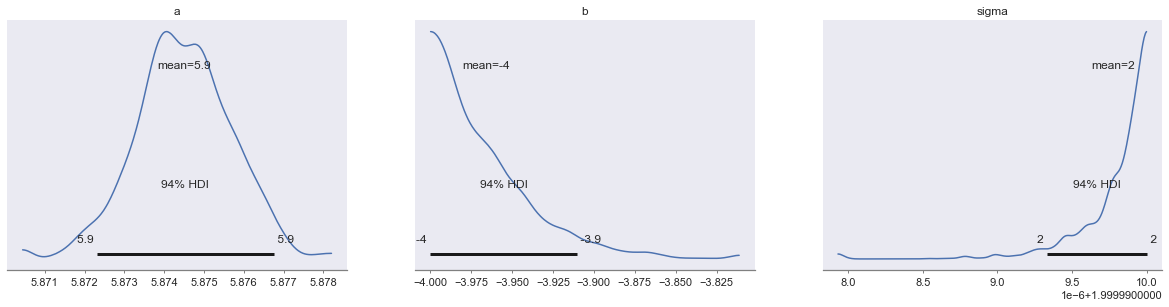

In [555]:
graphss(trace_up_nuts)

In [518]:
mu_obs=up.mean()
mu_obs

55.67212999999998

In [519]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.05,(1,))[0]]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [520]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,y,acceptance)

In [521]:
print(accepted.shape)

(43817, 2)


In [522]:
print(rejected.shape)

(6183, 2)


(48047, 2)

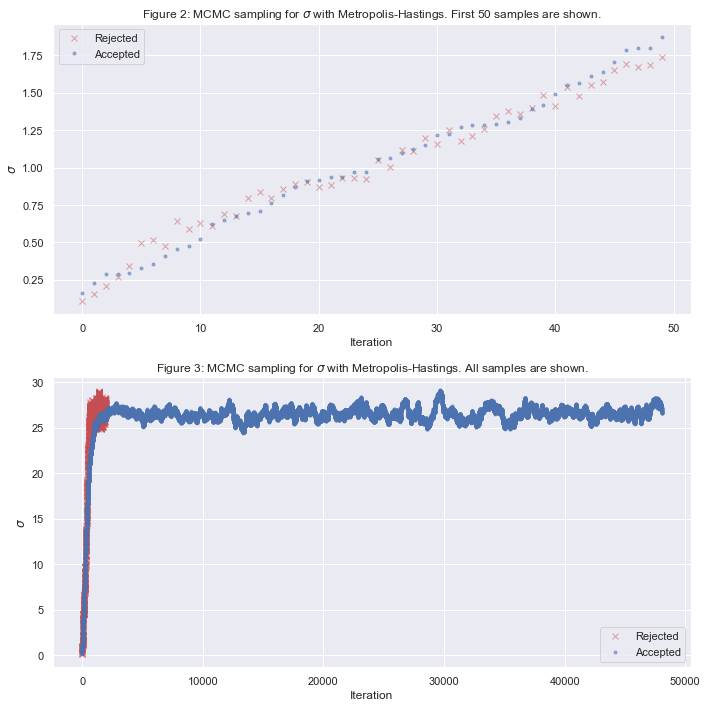

In [182]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

(43817, 2)

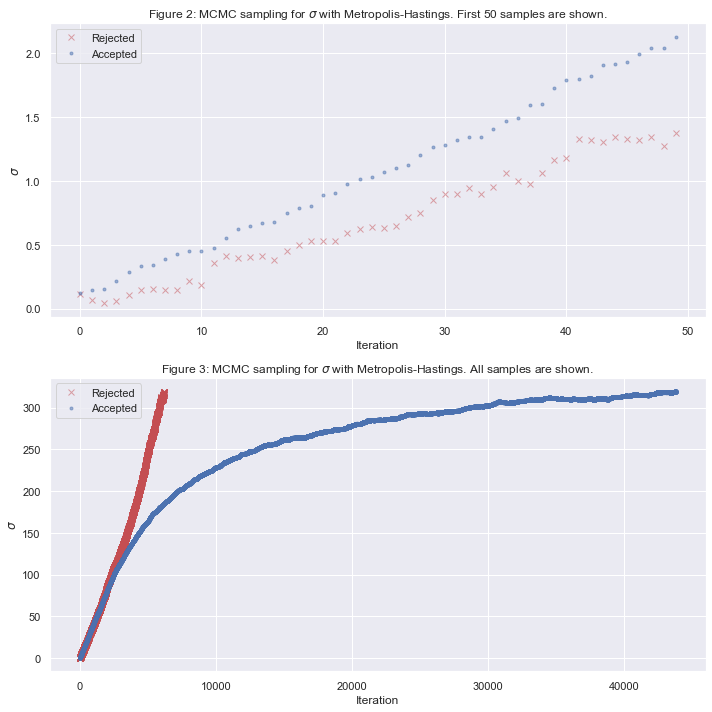

In [523]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

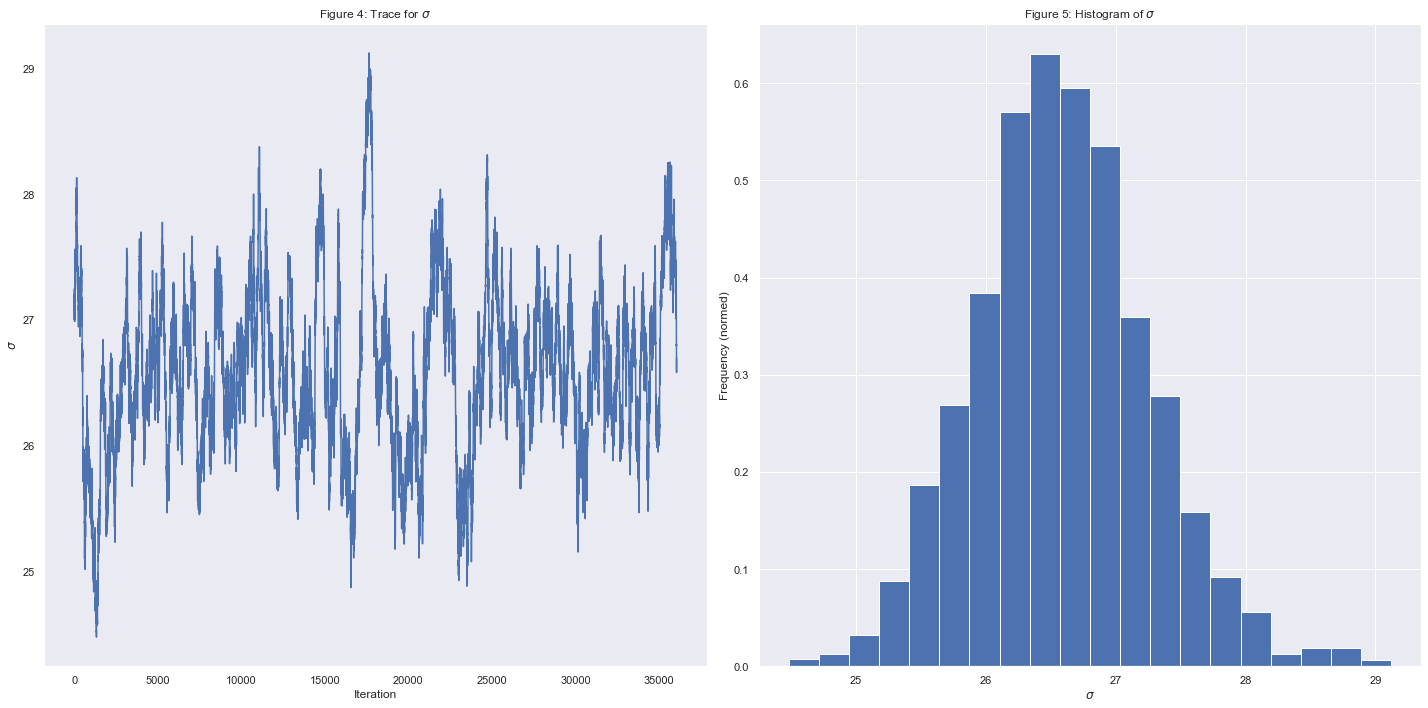

In [189]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 4: Trace for $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Figure 5: Histogram of $\sigma$")
fig.tight_layout()


ax.grid("off")

55.672129999999974 26.586040261229442


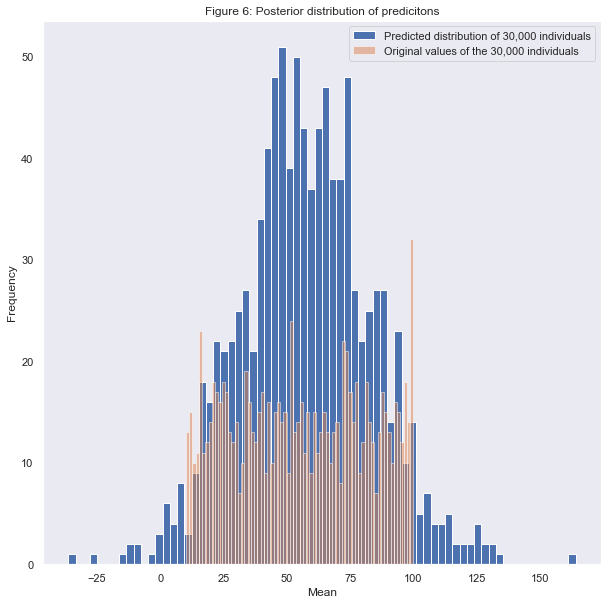

In [185]:
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen=model(up.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation_gen,bins=70 ,label="Predicted distribution of 30,000 individuals")
ax.hist( up,bins=70 ,alpha=0.5, label="Original values of the 30,000 individuals")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Figure 6: Posterior distribution of predicitons")
ax.legend()

In [191]:
X.head()

City  Customer type  Gender  Unit price  Quantity  Payment    cogs  Rating
0     2              0       0       74.69         7        2  522.83     9.1
1     1              1       0       15.28         5        0   76.40     9.6
2     2              1       1       46.33         7        1  324.31     7.4
3     2              0       1       58.22         8        2  465.76     8.4
4     2              1       1       86.31         7        2  604.17     5.3

In [199]:
gen=X['Gender']

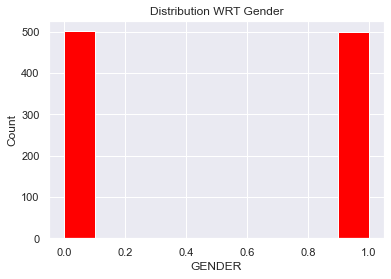

In [556]:
gen.hist(color = "red", edgecolor = "white")
plt.xlabel('GENDER'); plt.ylabel('Count');
plt.title('Distribution WRT Gender');

In [202]:
import theano.tensor as tt

In [560]:
#y_simple = df['Total']
x_n = 'AcceptedCmp5' 
x_0 = df['Gender'].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=x_0)

    step  = [pm.Metropolis()]
    trace_sim = pm.sample(10000, chains=2, step=step,progressbar=True)
    burned_trace_sim = trace_sim[300::]

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [β]
>Metropolis: [α]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 12 seconds.
The number of effective samples is smaller than 10% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1003) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'β'}>,
        <AxesSubplot:title={'center':'θ\n0'}>,
        <AxesSubplot:title={'center':'θ\n1'}>],
       [<AxesSubplot:title={'center':'θ\n2'}>,
        <AxesSubplot:title={'center':'θ\n3'}>,
        <AxesSubplot:title={'center':'θ\n4'}>,
        <AxesSubplot:title={'center':'θ\n5'}>],
       [<AxesSubplot:title={'center':'θ\n6'}>,
        <AxesSubplot:title={'center':'θ\n7'}>,
        <AxesSubplot:title={'center':'θ\n8'}>,
        <AxesSubplot:title={'center':'θ\n9'}>],
       [<AxesSubplot:title={'center':'θ\n10'}>,
        <AxesSubplot:title={'center':'θ\n11'}>,
        <AxesSubplot:title={'center':'θ\n12'}>,
        <AxesSubplot:title={'center':'θ\n13'}>],
       [<AxesSubplot:title={'center':'θ\n14'}>,
        <AxesSubplot:title={'center':'θ\n15'}>,
        <AxesSubplot:title={'center':'θ\n16'}>,
        <AxesSubplot:title={'center':'θ\n17'}>],
       [<AxesSubplot:title={'center':'θ\n18'}>,
     

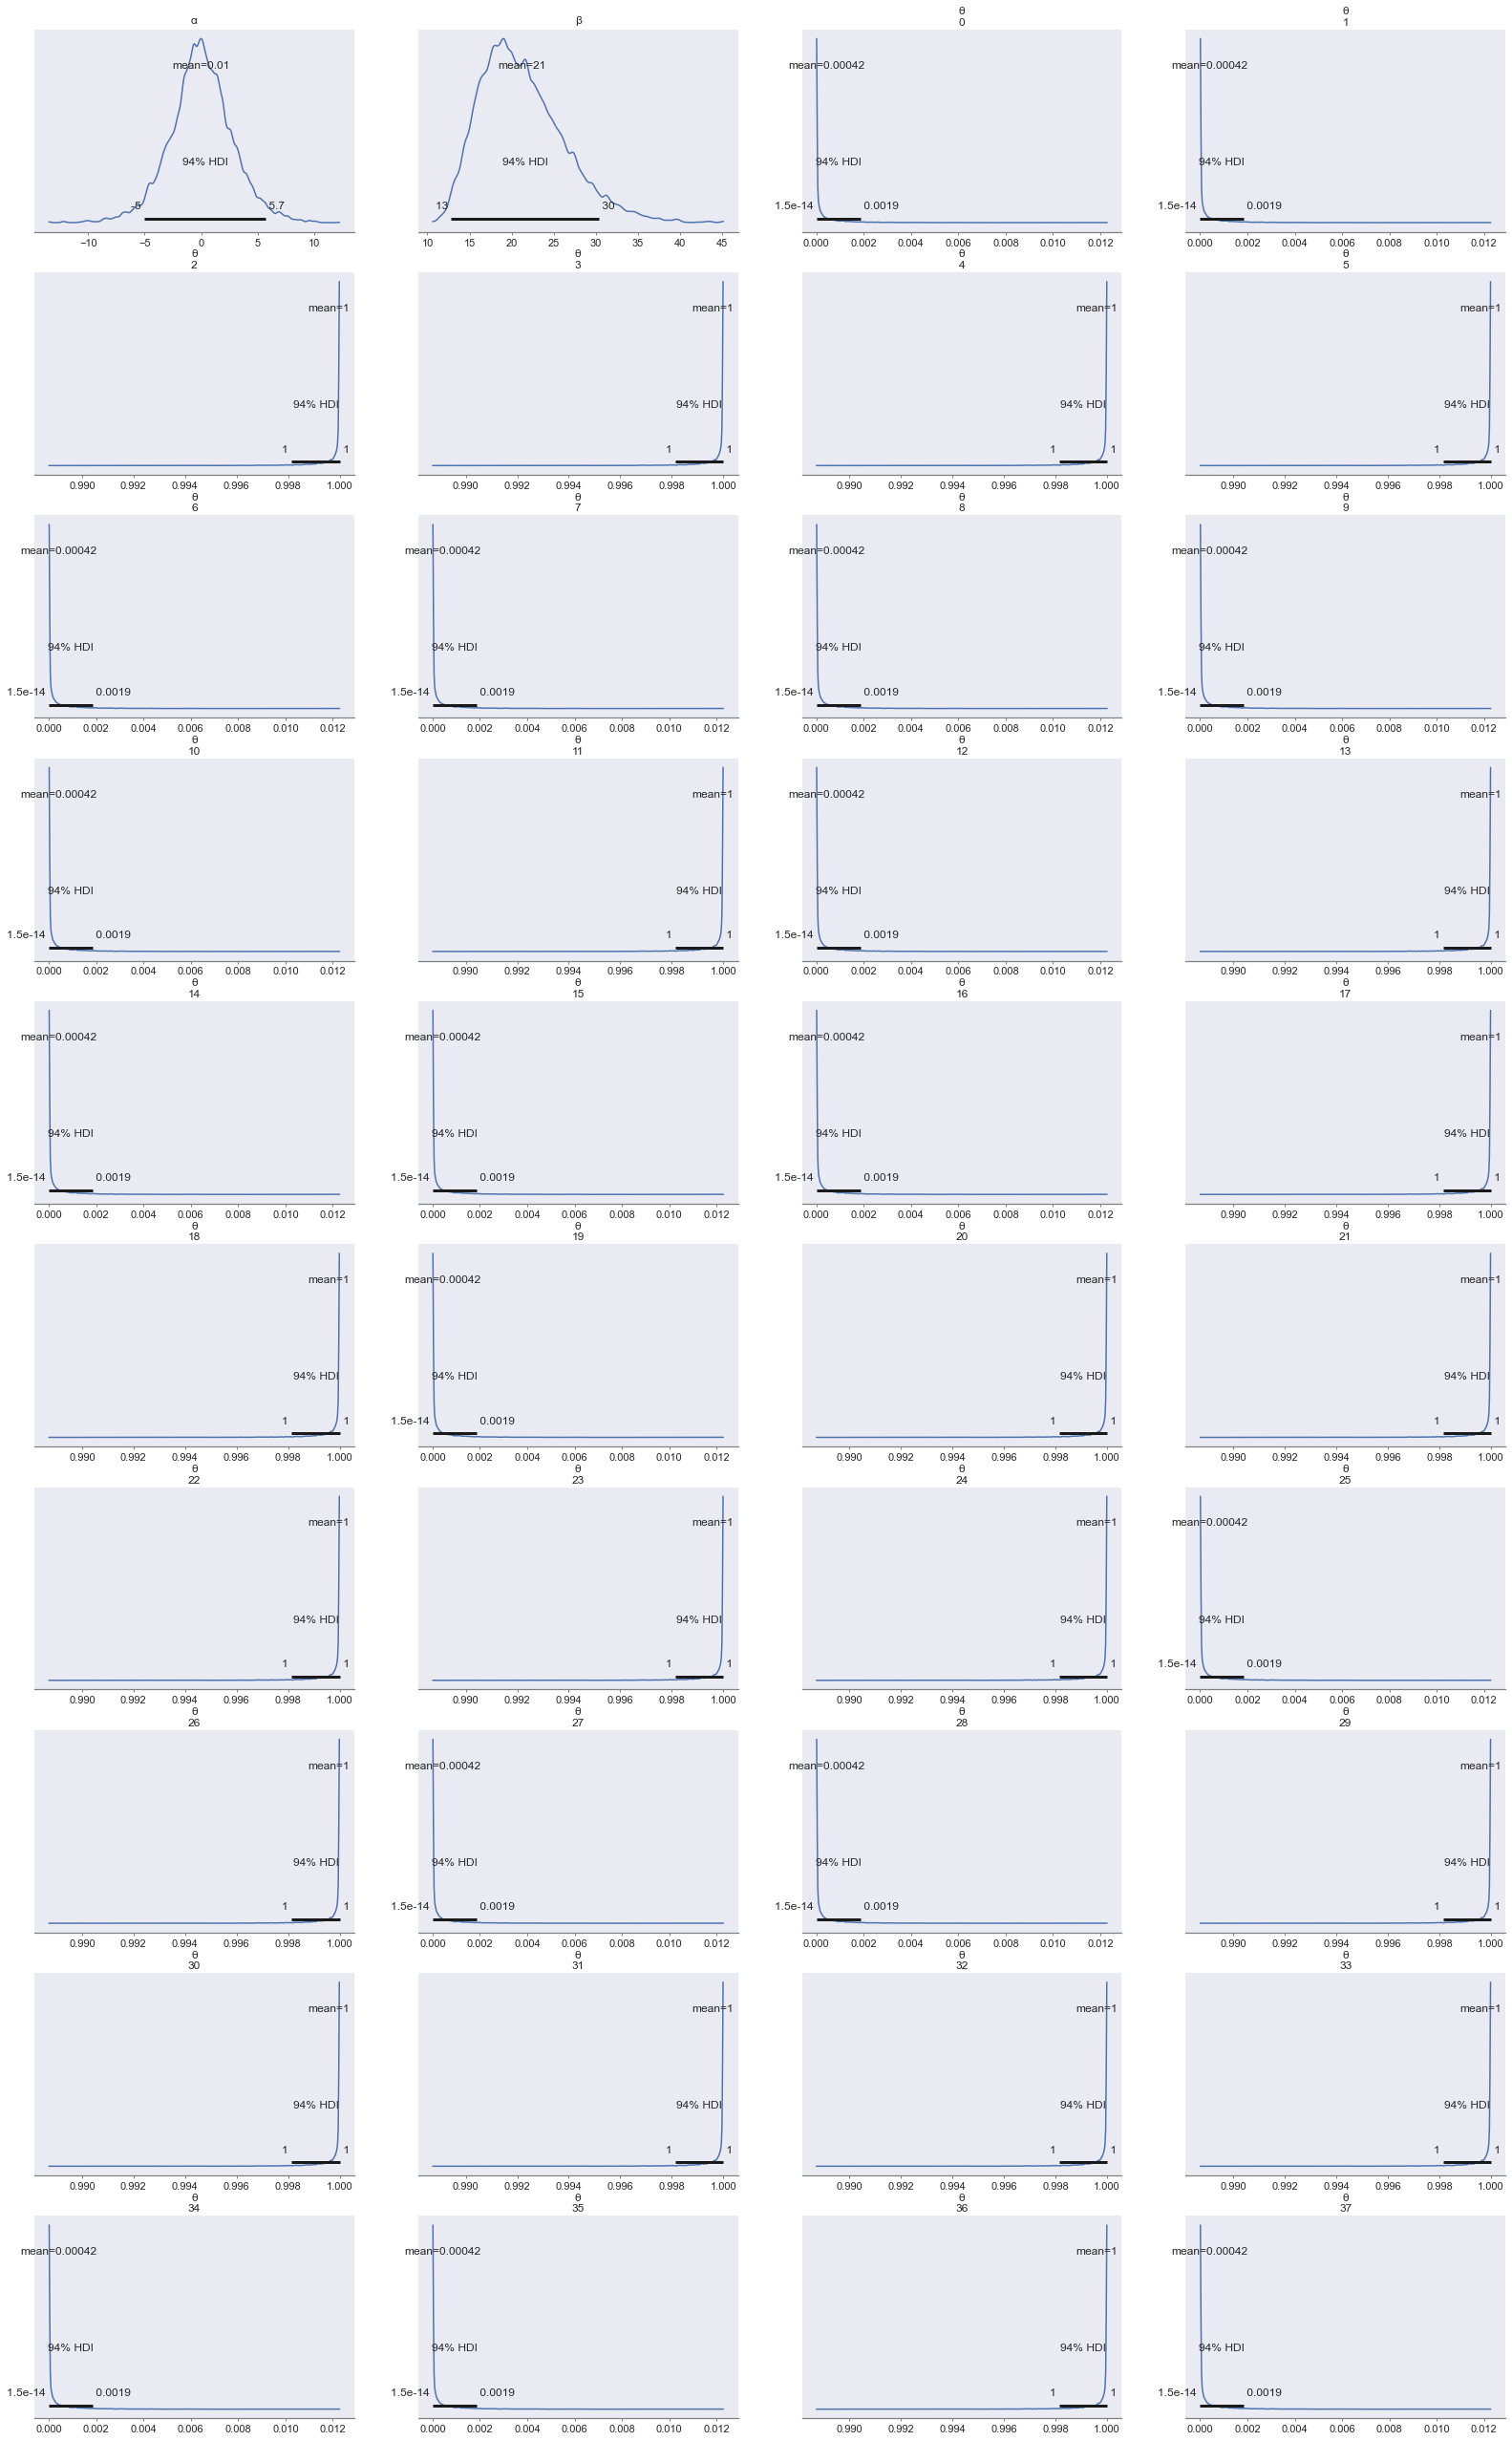

In [282]:
az.plot_posterior(burned_trace_sim)

/var/folders/1x/hsffh9g97bl3r14dc52jynvr0000gn/T/ipykernel_26726/492230432.py:2: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(burned_trace_sim)
/opt/anaconda3/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (2006) in plot_autocorr, generating only 40 plots
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1003) in plot_posterior, generating only 40 plots
  warnings.warn(


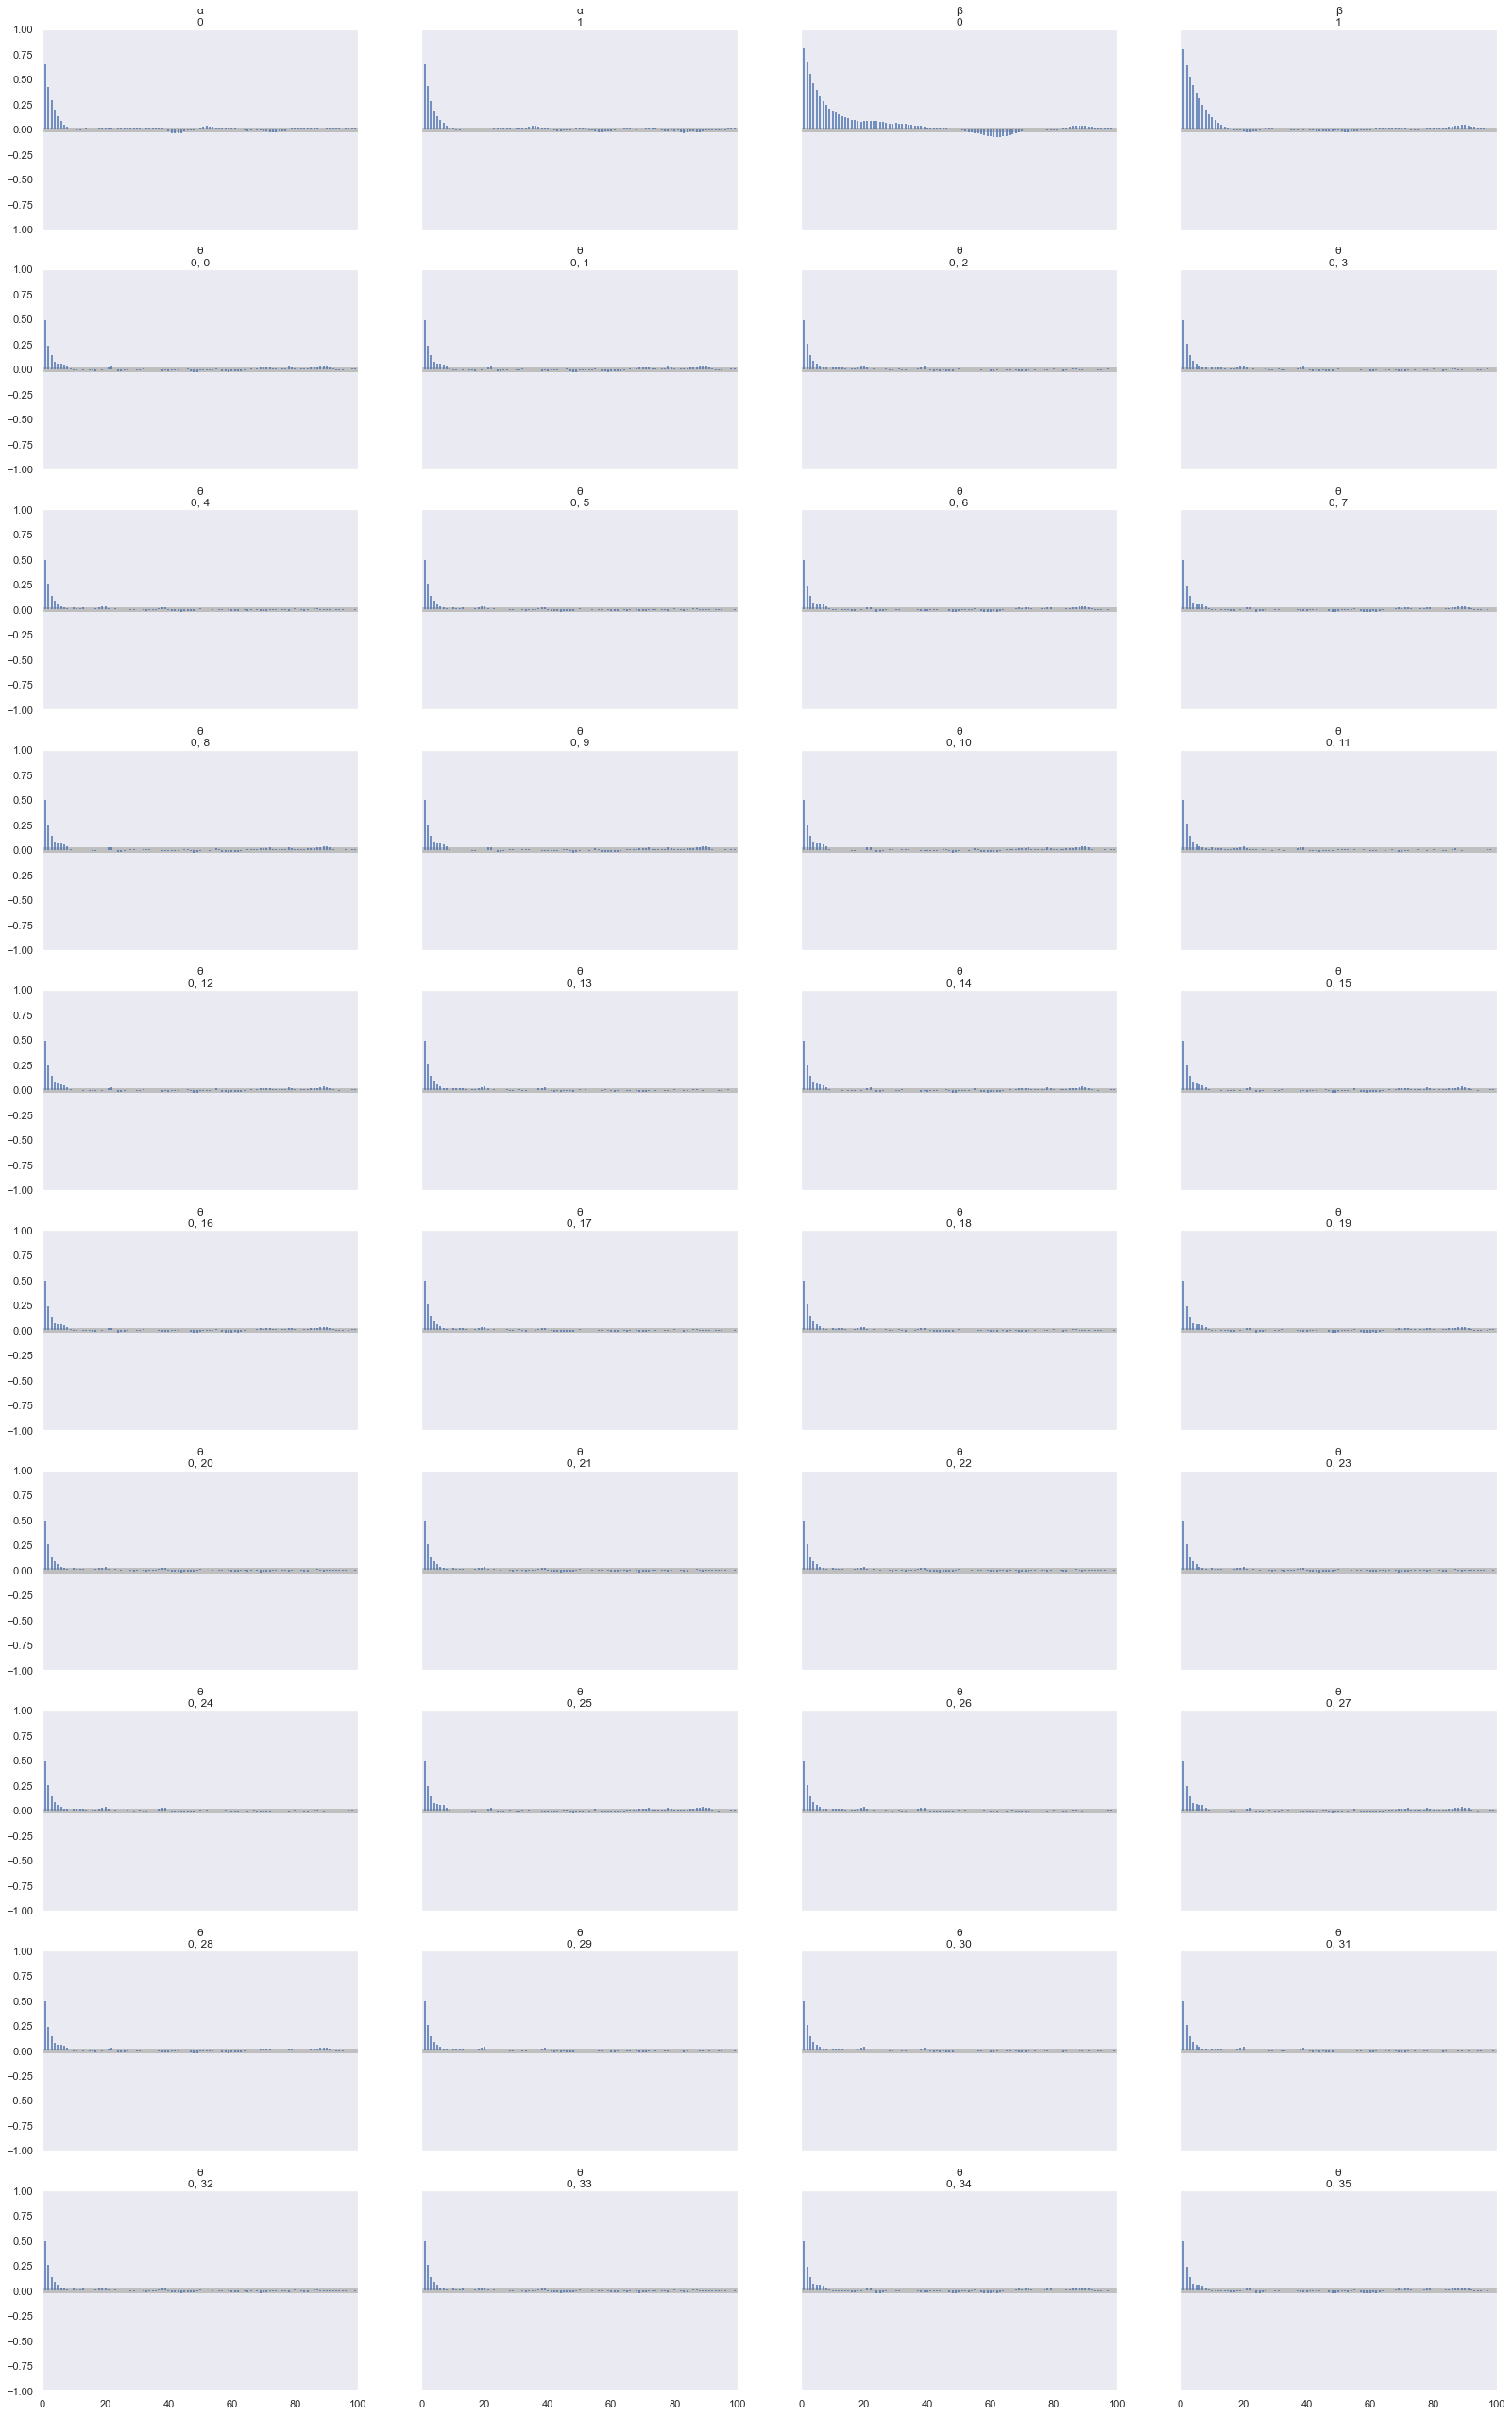

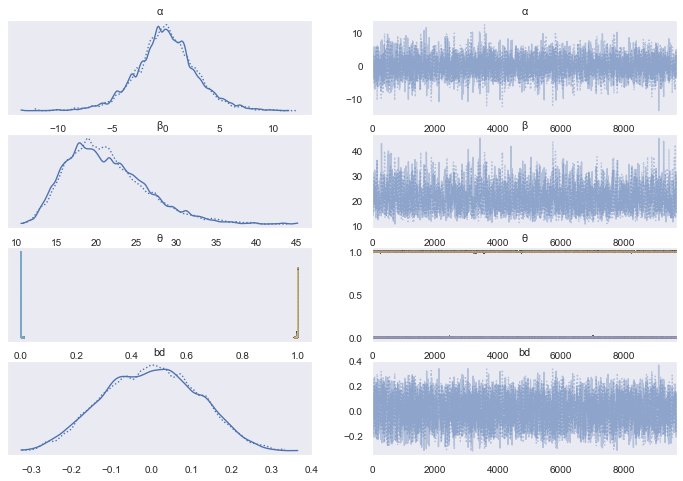

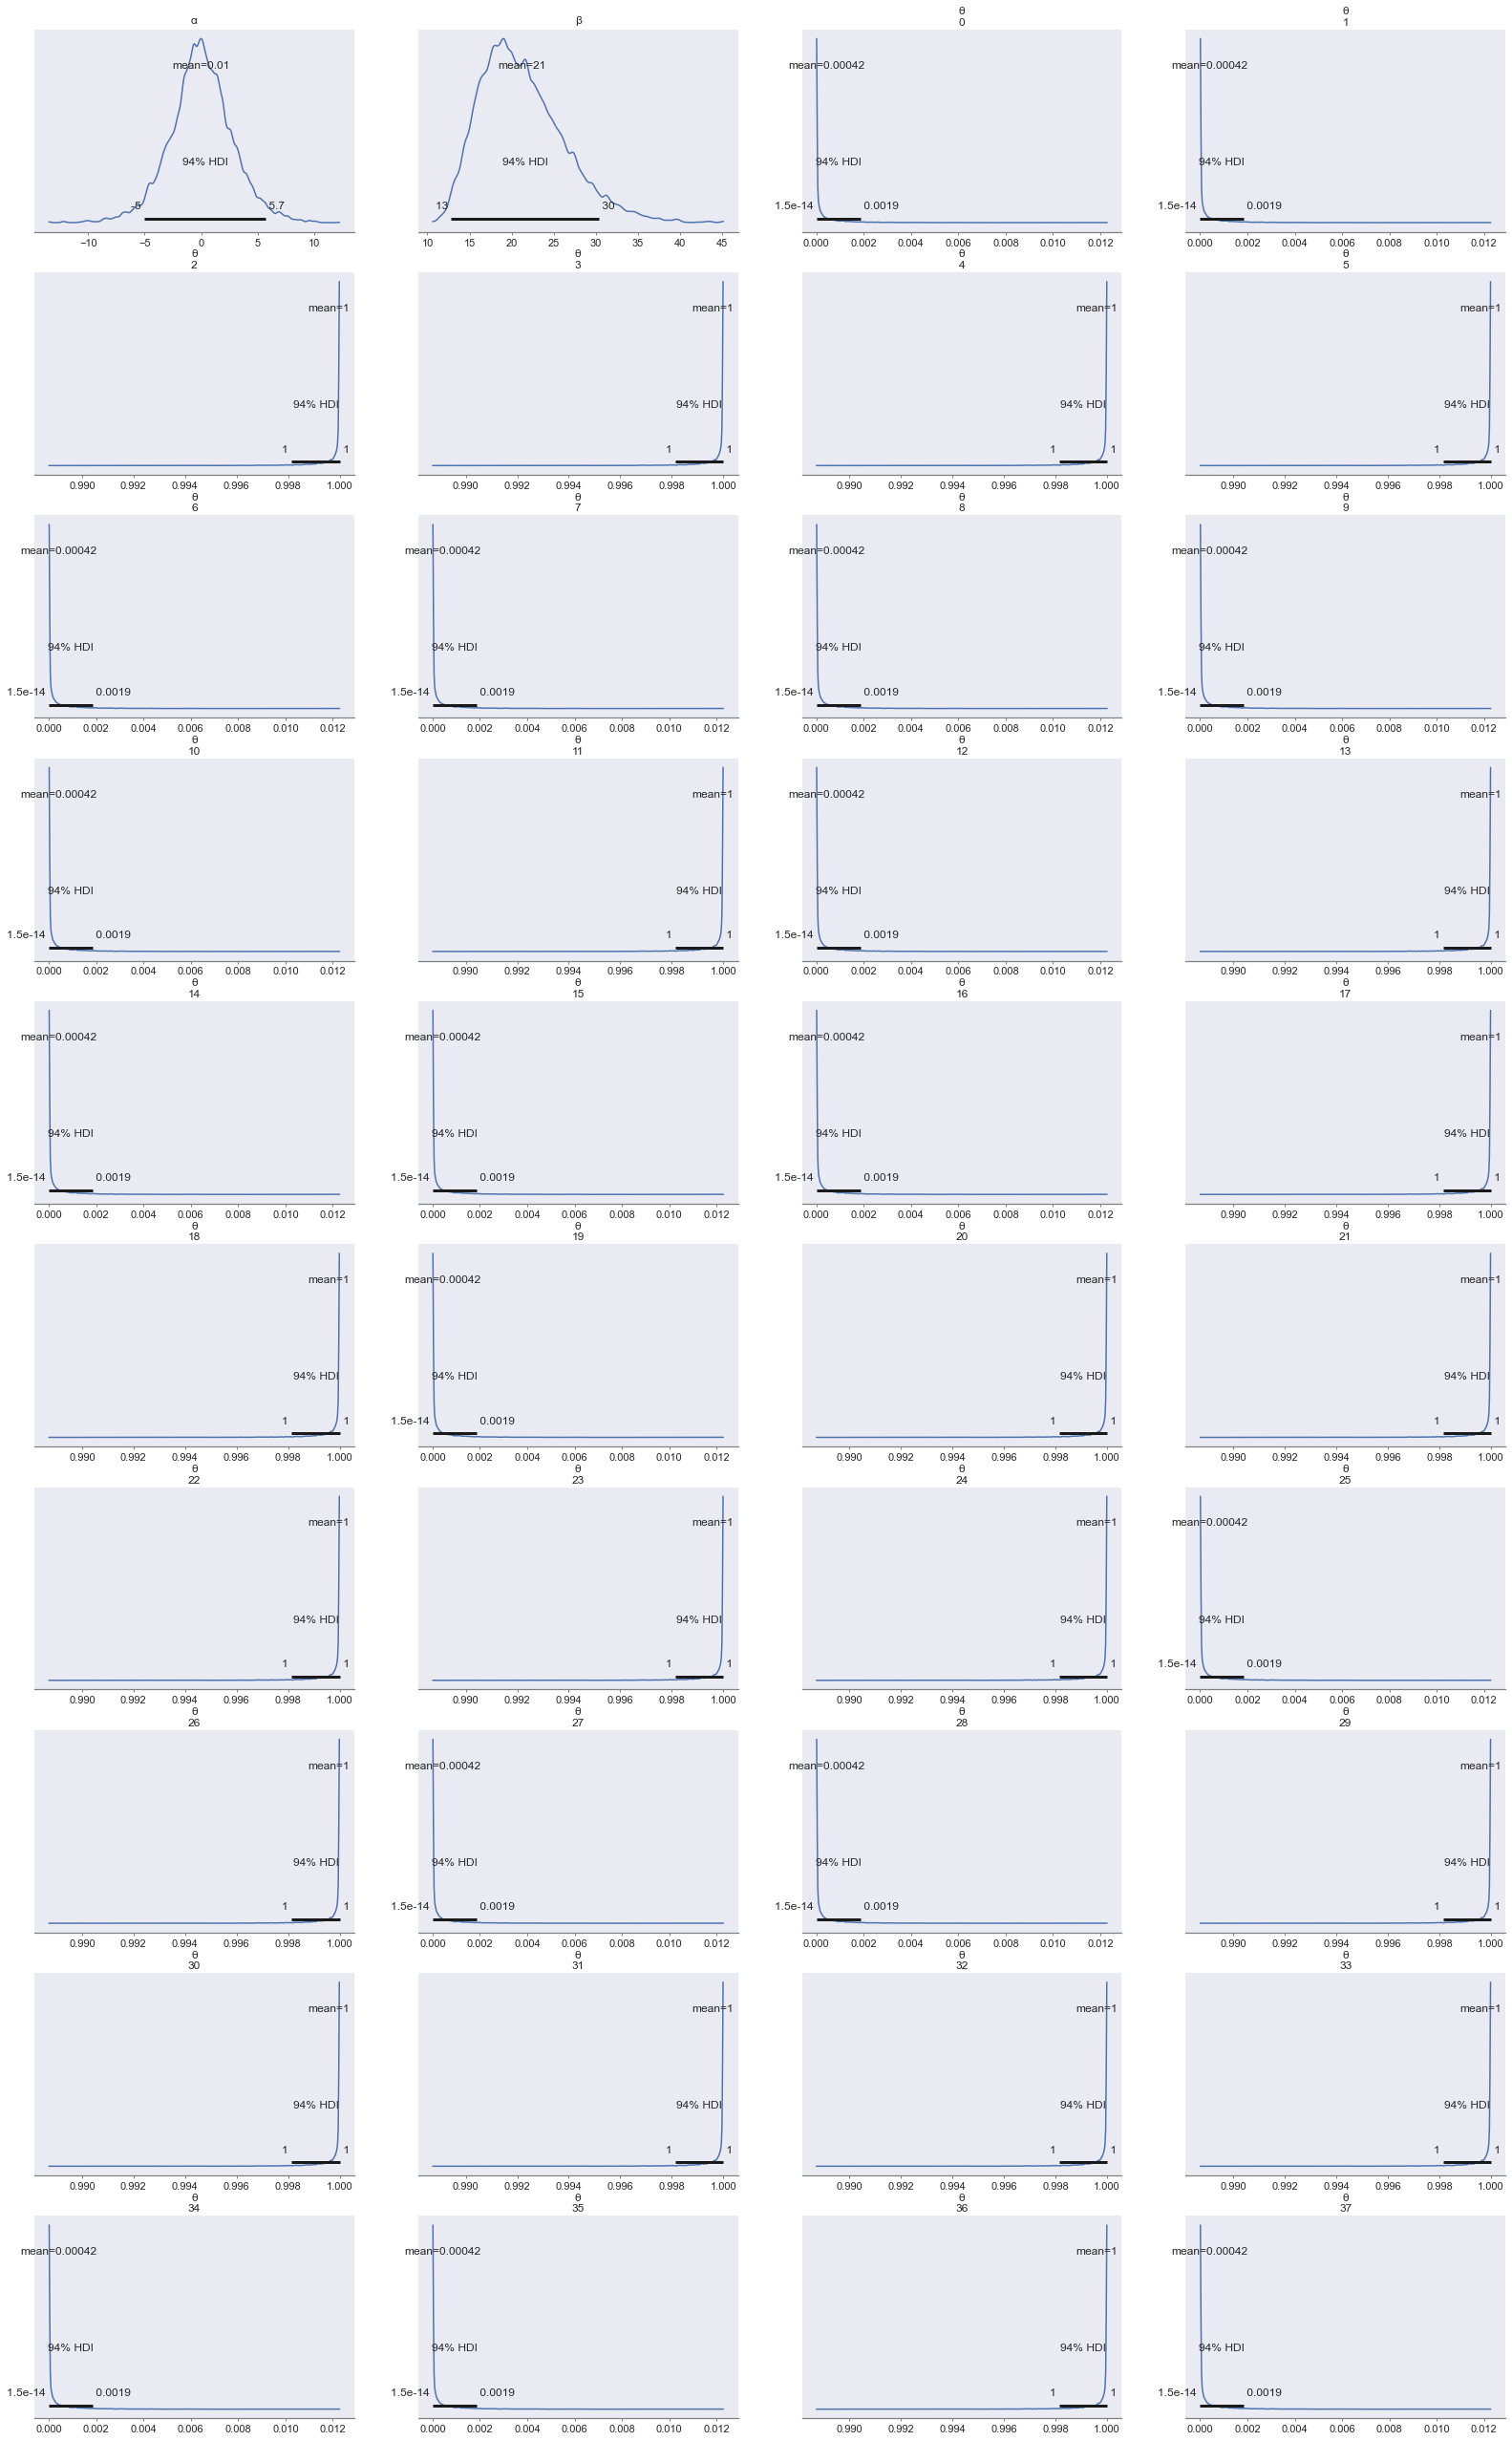

In [283]:
with model_simple:
    pm.autocorrplot(burned_trace_sim)
    az.plot_trace(burned_trace_sim);
    az.plot_posterior(burned_trace_sim);

/var/folders/1x/hsffh9g97bl3r14dc52jynvr0000gn/T/ipykernel_26726/566986491.py:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.plots.forestplot(burned_trace_sim, figsize=(12, 5))


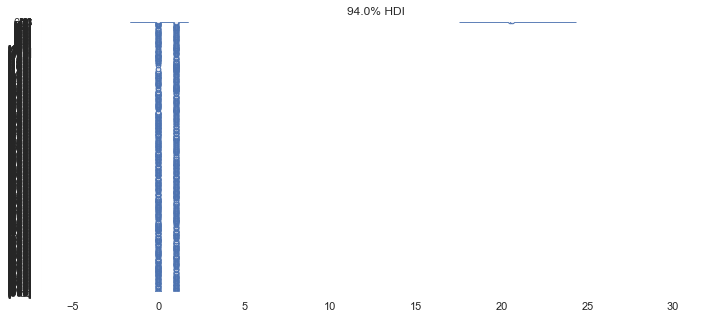

In [284]:
with model_simple:
    pm.plots.forestplot(burned_trace_sim, figsize=(12, 5))
    # The creates a matplotlib plot, so we can modify with standard matplotlib commands
    
    plt.grid()  # add a grid to the plot

In [558]:
pm.summary(burned_trace_sim)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
α        0.010  2.811  -5.021    5.738      0.044    0.038    4203.0   
β       21.256  4.977  12.819   30.399      0.119    0.086    1905.0   
θ[0]     0.000  0.001   0.000    0.002      0.000    0.000    3380.0   
θ[1]     0.000  0.001   0.000    0.002      0.000    0.000    3380.0   
θ[2]     1.000  0.001   0.998    1.000      0.000    0.000    2960.0   
...        ...    ...     ...      ...        ...      ...       ...   
θ[996]   0.000  0.001   0.000    0.002      0.000    0.000    3380.0   
θ[997]   1.000  0.001   0.998    1.000      0.000    0.000    2960.0   
θ[998]   1.000  0.001   0.998    1.000      0.000    0.000    2960.0   
θ[999]   0.000  0.001   0.000    0.002      0.000    0.000    3380.0   
bd      -0.000  0.117  -0.215    0.212      0.002    0.001    4309.0   

        ess_tail  r_hat  
α         3927.0    1.0  
β         2457.0    1.0  
θ[0]      3180.0    1.0  
θ[1]      3180.0    1.0  
θ[2]      3385.0    1.0  
...          ...    ...  
θ[996]    3180.0    1.0  
θ[997]    3385.0    1.0  
θ[998]    3385.0    1.0  
θ[999]    3180.0    1.0  
bd        4754.0    1.0  

[1003 rows x 9 columns]

In [567]:
quan=df['Quantity']

In [571]:
quan.mean()

5.51

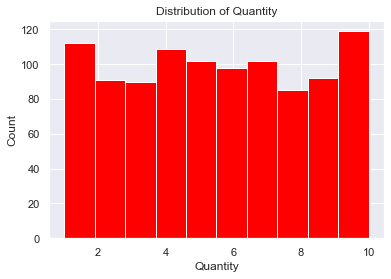

In [572]:
quan.hist(color = "red", edgecolor = "white")
plt.xlabel('Quantity'); plt.ylabel('Count');
plt.title('Distribution of Quantity');

In [581]:
x_data = quan
y_data = total

with pm.Model() as model_quan:
    a = pm.Uniform('a', 0, 4)
    b = pm.Uniform('b', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_est = a * x_data + b
    y = pm.Normal('y', 
                  mu=y_est, sd=sigma, 
                  observed=y_data)
    step = pm.NUTS()
    trace = pm.sample(1000, chains=2, step=step, tune=2000, progressbar=True)
    trace_quan = trace[300::]

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 11 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


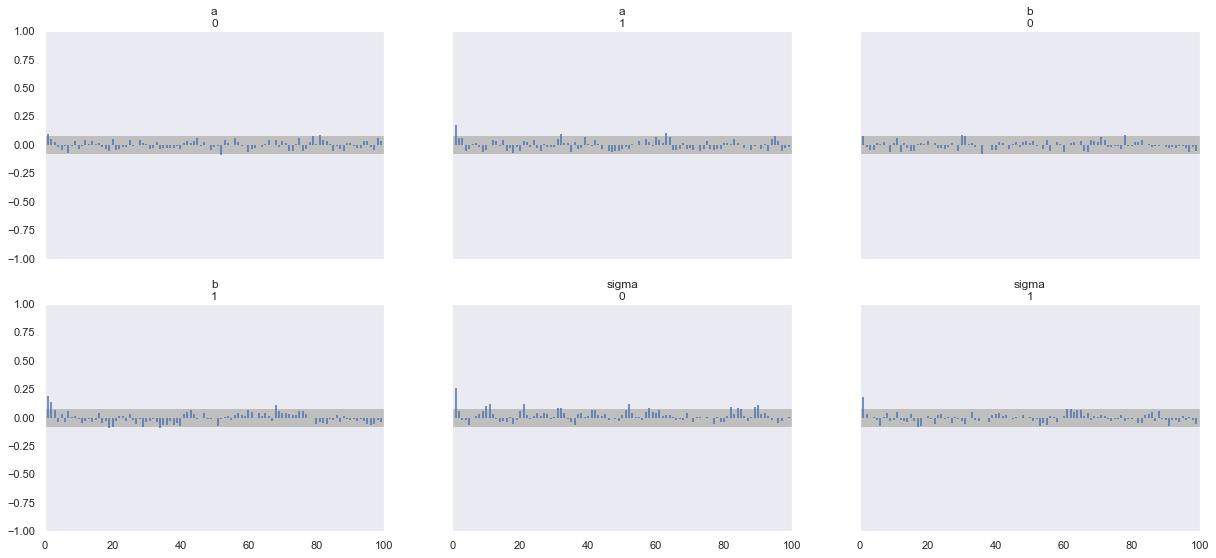

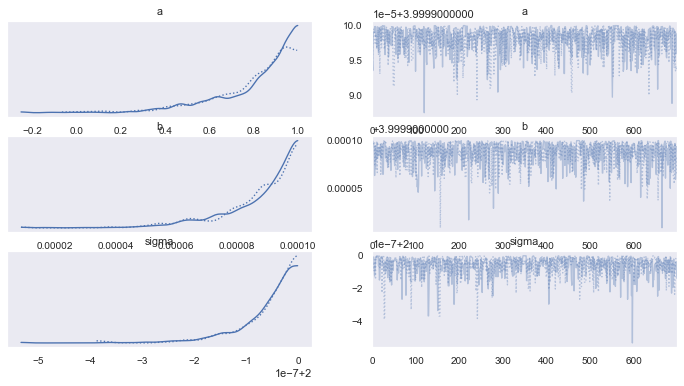

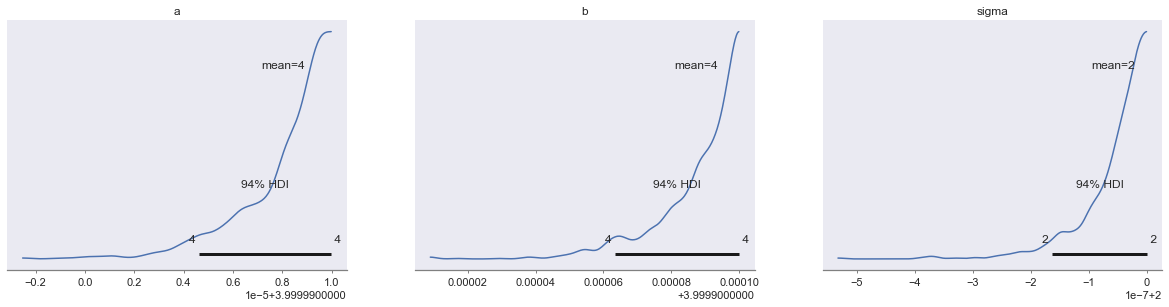

In [579]:
graphss(trace_quan)

In [287]:
R=X['Rating']

In [290]:
R.values.mean()

6.9727

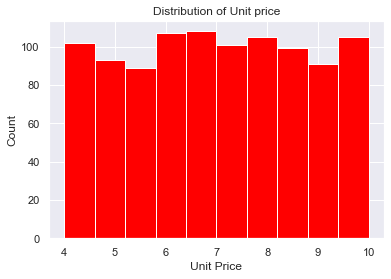

In [293]:
R.hist(color = "red", edgecolor = "white")
plt.xlabel('Ratings'); plt.ylabel('Count');
plt.title('Distribution of Unit price');

([<matplotlib.axis.YTick at 0x7fec34bd6b80>], [Text(0, 0, '')])

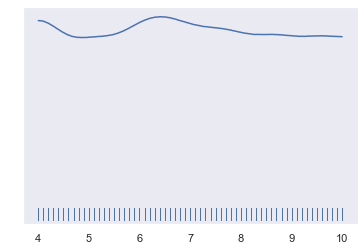

In [291]:
view_distribution(R)

In [296]:

with pm.Model() as model_r:
    mu = pm.Normal('mu', 0, 1)
    # sigma = 1.0
    sigma = pm.Normal('sigma', sd=2.0)

    #predictive = pm.Normal('predictive', mu=mu, sd=sigma)
    obs_r = pm.Uniform('returns', lower=0, upper=100, observed=y)

    step = pm.NUTS()
    trace = pm.sample(50000, chains=2, step=step, tune=2000, progressbar=True)
    burned_trace_r = trace[300::]

/var/folders/1x/hsffh9g97bl3r14dc52jynvr0000gn/T/ipykernel_26726/170090962.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(50000, chains=2, step=step, tune=2000, progressbar=True)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 2_000 tune and 50_000 draw iterations (4_000 + 100_000 draws total) took 23 seconds.


/var/folders/1x/hsffh9g97bl3r14dc52jynvr0000gn/T/ipykernel_26726/572270487.py:2: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(burned_trace_r)


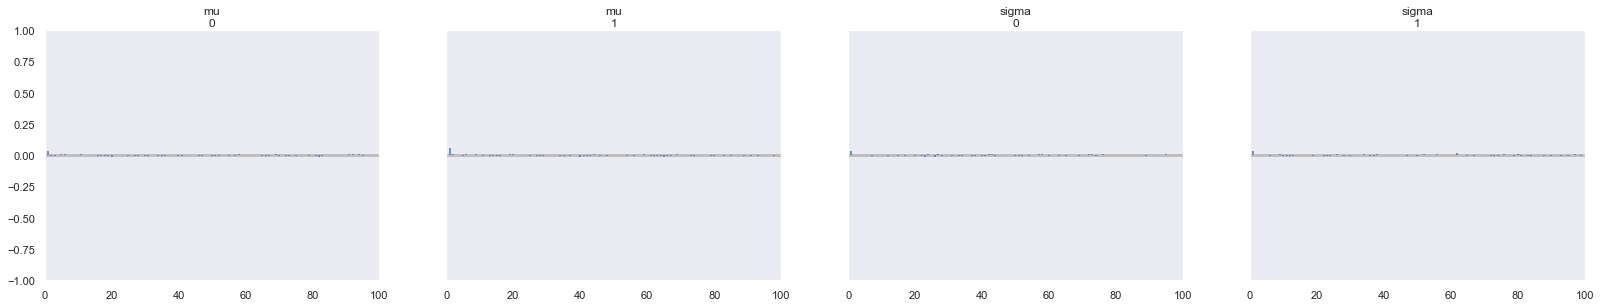

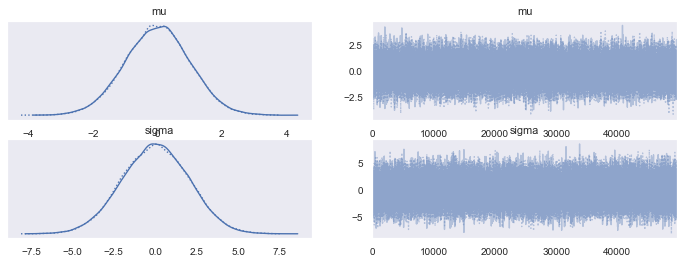

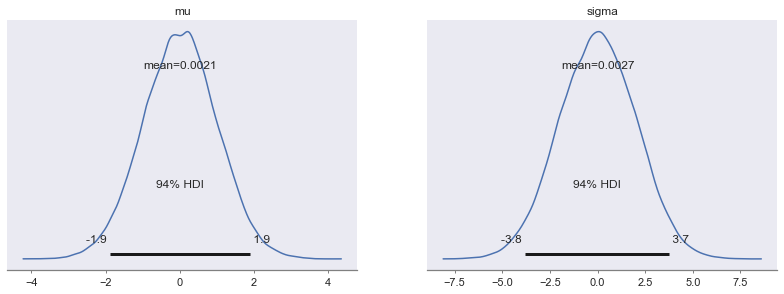

In [297]:
with model_r:
    pm.autocorrplot(burned_trace_r)
    az.plot_trace(burned_trace_r);
    az.plot_posterior(burned_trace_r);

In [584]:
def sample_beta_0(y, x, beta_1, tau, mu_0, tau_0):
    N = len(y)
    assert len(x) == N
    precision = tau_0 + tau * N
    mean = tau_0 * mu_0 + tau * np.sum(y - beta_1 * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [585]:
def sample_beta_1(y, x, beta_0, tau, mu_1, tau_1):
    N = len(y)
    assert len(x) == N
    precision = tau_1 + tau * np.sum(x * x)
    mean = tau_1 * mu_1 + tau * np.sum( (y - beta_0) * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [586]:
def sample_tau(y, x, beta_0, beta_1, alpha, beta):
    N = len(y)
    alpha_new = alpha + N / 2
    resid = y - beta_0 - beta_1 * x
    beta_new = beta + np.sum(resid * resid) / 2
    return np.random.gamma(alpha_new, 1 / beta_new)

In [587]:
## specify initial values
init = {"beta_0": 0,
        "beta_1": 0,
        "tau": 2}

## specify hyper parameters
hypers = {"mu_0": 0,
         "tau_0": 1,
         "mu_1": 0,
         "tau_1": 1,
         "alpha": 2,
         "beta": 1}

In [588]:
def gibbs(y, x, iters, init, hypers):
    assert len(y) == len(x)
    beta_0 = init["beta_0"]
    beta_1 = init["beta_1"]
    tau = init["tau"]
    
    trace = np.zeros((iters, 3)) ## trace to store values of beta_0, beta_1, tau
    
    for it in range(iters):
        beta_0 = sample_beta_0(y, x, beta_1, tau, hypers["mu_0"], hypers["tau_0"])
        beta_1 = sample_beta_1(y, x, beta_0, tau, hypers["mu_1"], hypers["tau_1"])
        tau = sample_tau(y, x, beta_0, beta_1, hypers["alpha"], hypers["beta"])
        trace[it,:] = np.array((beta_0, beta_1, tau))
        
    trace = pd.DataFrame(trace)
    trace.columns = ['beta_0', 'beta_1', 'tau']
        
    return trace

In [605]:
iters = 10000
trace = gibbs(Total,up, iters, init, hypers)

Text(0, 0.5, 'Parameter value')

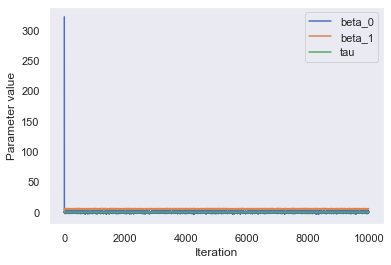

In [606]:
traceplot = trace.plot()
traceplot.set_xlabel("Iteration")
traceplot.set_ylabel("Parameter value")

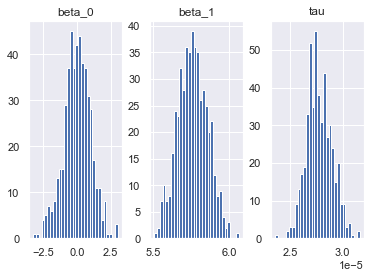

In [607]:
trace_burnt = trace[500:999]
hist_plot = trace_burnt.hist(bins = 30, layout = (1,3))


In [325]:
X.head()

City  Customer type  Gender  Unit price  Quantity  Payment    cogs  Rating
0     2              0       0       74.69         7        2  522.83     9.1
1     1              1       0       15.28         5        0   76.40     9.6
2     2              1       1       46.33         7        1  324.31     7.4
3     2              0       1       58.22         8        2  465.76     8.4
4     2              1       1       86.31         7        2  604.17     5.3

In [326]:
y.head()

0    548.9715
1     80.2200
2    340.5255
3    489.0480
4    634.3785
Name: Total, dtype: float64

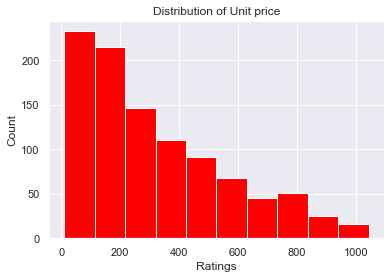

In [327]:
y.hist(color = "red", edgecolor = "white")
plt.xlabel('Ratings'); plt.ylabel('Count');
plt.title('Distribution of Unit price');

In [664]:
X_train = X_train.rename(columns={'Customer type': 'c_type', 'Unit price': 'unit_price'})

In [665]:
X_train = X_train.rename(columns={'Product line': 'p_line'})

In [666]:
df = df.rename(columns={'Product line': 'p_line'})

In [667]:
df=df.rename(columns={'Customer type': 'c_type', 'Unit price': 'unit_price'})

In [752]:
df= df.rename(columns={'City':'City','Customer type':'c_type','Product line':'p_line','Unit price':'unit_price','Payment':'payment'})
#labels = df['total']
#X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                       # test_size = 0.25,
                                                        #random_state=42)

In [753]:
y_label= df['Total']
X_train, X_test, y_train, y_test = train_test_split(df, y_label, 
                                                        test_size = 0.25,
                                                        random_state=42)

In [654]:
X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test = pd.DataFrame(X_test, columns=X.columns)

In [668]:
X_train.head()

City  c_type  Gender  p_line  unit_price  Quantity  Payment    cogs  \
338     1       1       0       1       47.65         3        1  142.95   
367     2       0       1       0       65.94         4        0  263.76   
948     1       0       1       0       35.81         5        2  179.05   
275     0       1       1       1       47.97         7        0  335.79   
297     2       0       1       0       78.38         6        2  470.28   

     Rating  
338     9.5  
367     6.0  
948     7.9  
275     6.2  
297     5.8

In [672]:
X_train['Gender'].shape

(800,)

In [673]:

with pm.Model() as normal_model:
        
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
# Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula('y_train ~ City + c_type + Gender + p_line + unit_price + Quantity + Payment +cogs+Rating', data = X_train, family = family)
# Perform Markov Chain Monte Carlo sampling
    step  = pm.Metropolis()
    normal_trace_met = pm.sample(1000, chains=2, step=step, progressbar=True)
    #normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [Rating]
>Metropolis: [cogs]
>Metropolis: [Payment]
>Metropolis: [Quantity]
>Metropolis: [unit_price]
>Metropolis: [p_line]
>Metropolis: [Gender]
>Metropolis: [c_type]
>Metropolis: [City]
>Metropolis: [Intercept]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [765]:
X_test.head()

p_line  unit_price  Quantity  payment    cogs  Intercept  Rating  Gender
521       0       83.17         6        0  499.02          1     7.3       0
737       1       58.76        10        2  587.60          1     9.0       1
740       1       55.61         7        0  389.27          1     8.5       1
660       1       42.97         3        0  128.91          1     9.3       0
411       1       21.87         2        2   43.74          1     6.9       1

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


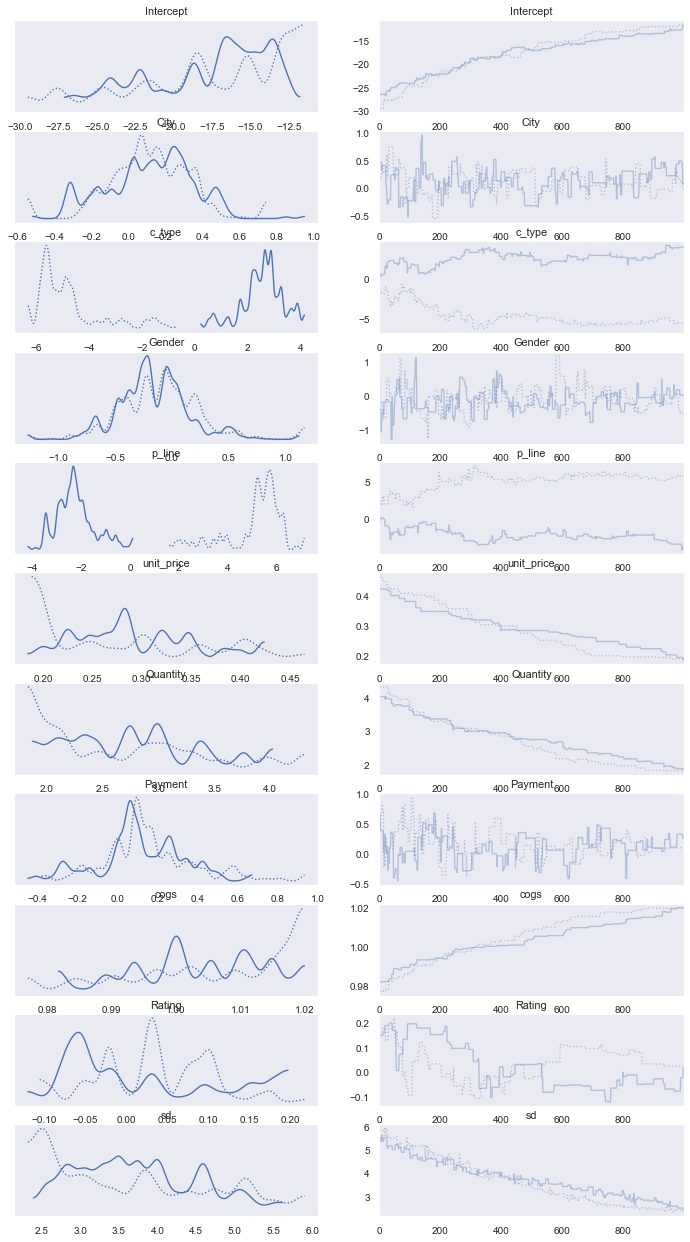

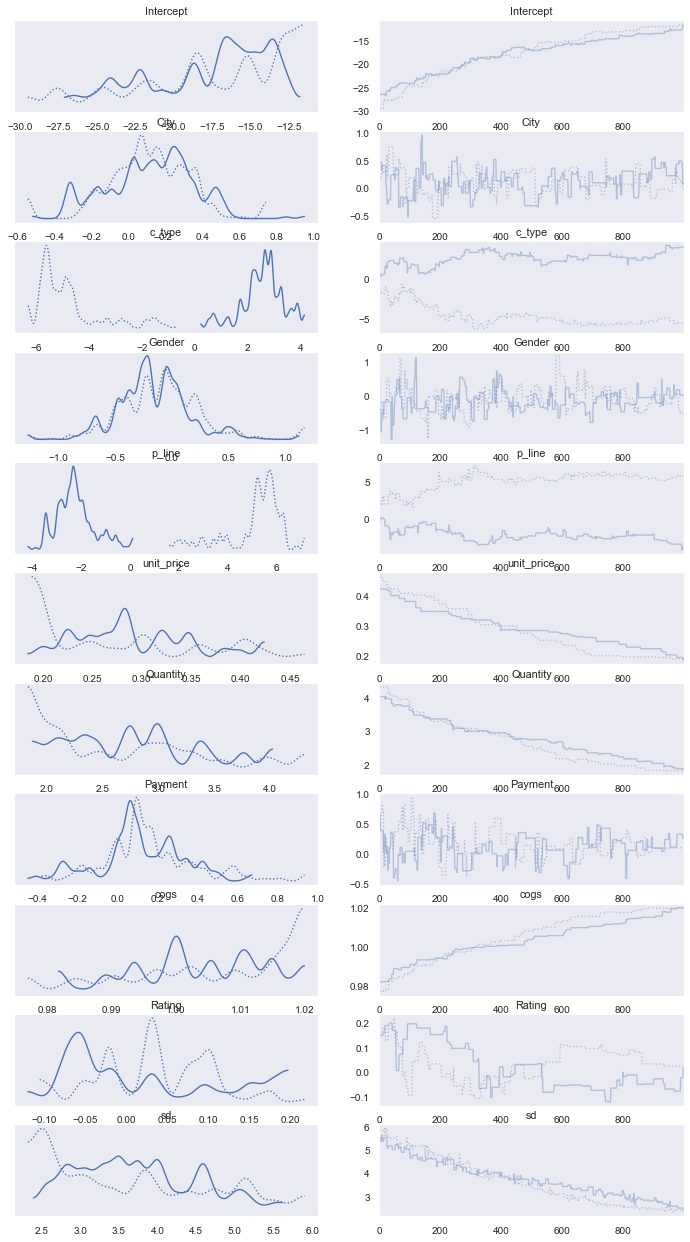

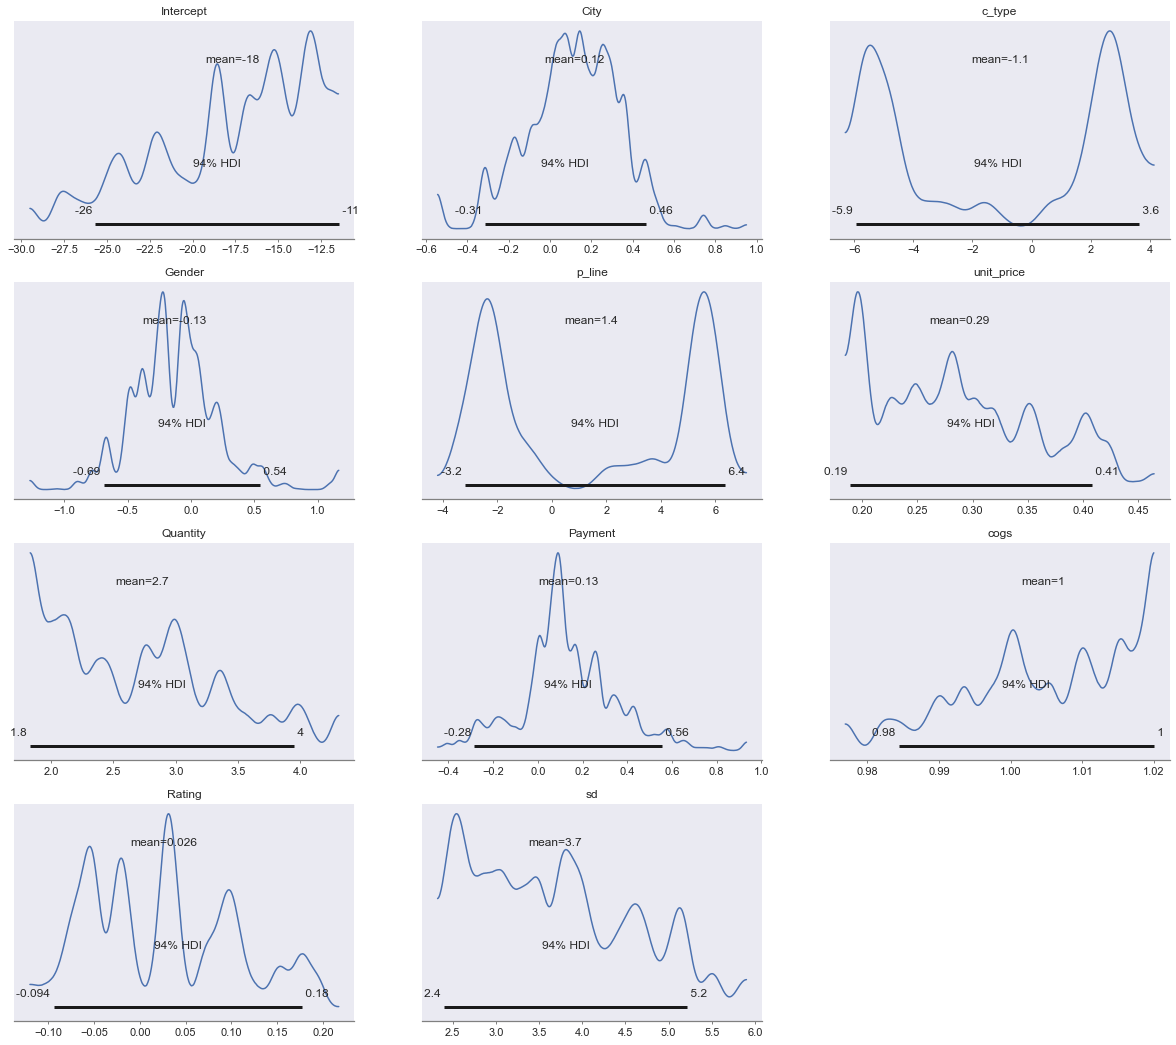

In [675]:
graphss(normal_trace_met)

In [766]:
var_dict = {}
for variable in normal_trace_met.varnames:
    var_dict[variable] = normal_trace_met[variable]

# Results into a dataframe
var_weights = pd.DataFrame(var_dict)

# Means for all the weights
var_means = var_weights.mean(axis=0)

# Create an intercept column

cols = X_test.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_test = X_test[cols]
X_test['Intercept'] = 1


# Align names of the test observations and means
X_test = X_test.drop('payment',axis = 1)
#X_test = X_test.drop('c_type', axis = 1)
#X_test = X_test.drop('Total', axis =1)
#X_test = X_test.drop('rating', axis =1)
        
names = X_test.columns[1:]

X_test_t = X_test.loc[:, names]

var_means = var_means[names]

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = X_test_t.index, columns = ['estimate'])

for row in X_test_t.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = results['estimate'] - actual
mae = np.mean(abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    


Model  MAE: 2.7597
Model RMSE: 3.6616


In [676]:
#formula = 'y_train ~ c_type + Gender + unit_price  + Quantity + Payment + cogs + Rating'
#print(formula)
# Context for the model
with pm.Model() as normal_model_nuts:
        
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
# Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula('y_train ~ City + c_type + Gender + p_line + unit_price + Quantity + Payment +cogs+Rating', data = X_train, family = family)
# Perform Markov Chain Monte Carlo sampling
# Perform Markov Chain Monte Carlo sampling
    step  = pm.NUTS()
    normal_trace_nuts = pm.sample(1000, chains=2, step=step, progressbar=True)
    #normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Rating, cogs, Payment, Quantity, unit_price, p_line, Gender, c_type, City, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 106 seconds.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 4.4170311722719024e-95, but should be close to 0.8. Try to increase the number of tuning steps.
There were 551 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5149143381345771, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


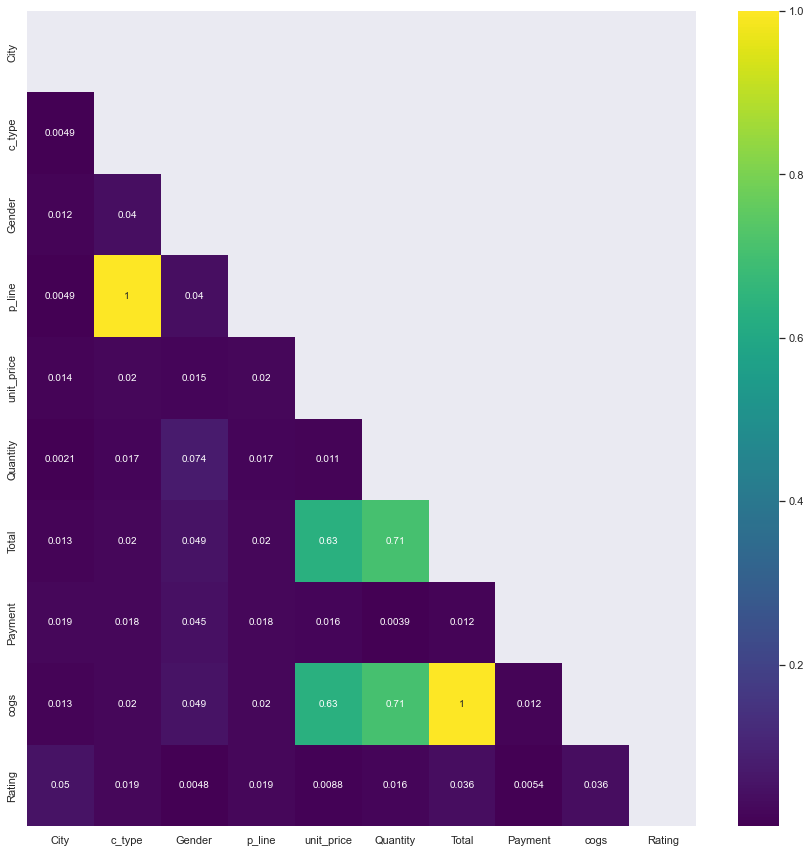

In [679]:
plt.figure(figsize=(15, 15))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

In [680]:
X_train.shape

(800, 9)

In [681]:
X_train=X_train.drop('c_type', axis=1)

In [687]:
import pymc3 as pm
from pymc3 import traceplot
# Formula for Bayesian Linear Regression 
formula = 'y_train ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
print(formula)
# Context for the model
with pm.Model() as normal_model_new:
        
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
# Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
# Perform Markov Chain Monte Carlo sampling
    step  = [pm.NUTS()]
    normal_trace_check_nuts_new = pm.sample(1000, chains=2, step=step, tune = 1000, init = 'adapt_diag', progressbar=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


y_train ~ Gender + p_line + unit_price + Quantity + Payment + cogs + Rating


Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [Rating]
>Metropolis: [cogs]
>Metropolis: [Payment]
>Metropolis: [Quantity]
>Metropolis: [unit_price]
>Metropolis: [p_line]
>Metropolis: [Gender]
>Metropolis: [Intercept]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'p_line'}>,
        <AxesSubplot:title={'center':'p_line'}>],
       [<AxesSubplot:title={'center':'unit_price'}>,
        <AxesSubplot:title={'center':'unit_price'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Payment'}>,
        <AxesSubplot:title={'center':'Payment'}>],
       [<AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'cogs'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Rating'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

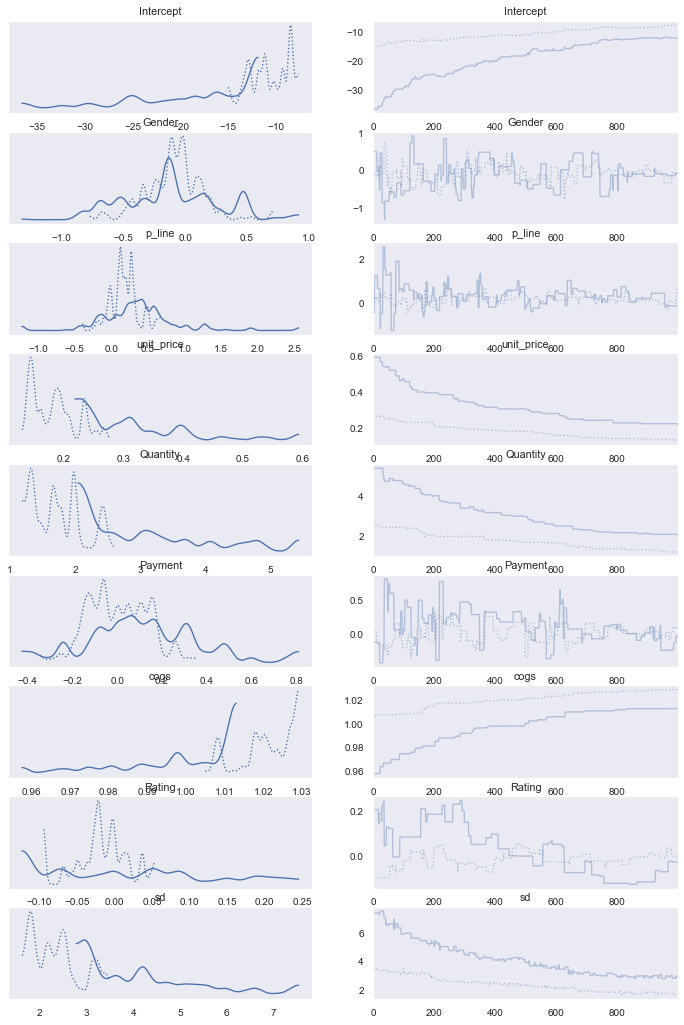

In [692]:
pm.traceplot(normal_trace_check_nuts_new)

In [694]:
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace_check_nuts_new[variable])))

Variable: Intercept       Mean weight in model: -15.0123
Variable: Gender          Mean weight in model: -0.1047
Variable: Quantity        Mean weight in model: 2.4181
Variable: Payment         Mean weight in model: 0.0595
Variable: cogs            Mean weight in model: 1.0091
Variable: Rating          Mean weight in model: 0.0040
Variable: sd_log__        Mean weight in model: 1.1135
Variable: sd              Mean weight in model: 3.2727


In [757]:
X_test.head()

Intercept  Rating  City  c_type  Gender  p_line  unit_price  Quantity  \
521          1     7.3     1       0       0       0       83.17         6   
737          1     9.0     1       1       1       1       58.76        10   
740          1     8.5     1       1       1       1       55.61         7   
660          1     9.3     0       1       0       1       42.97         3   
411          1     6.9     0       1       1       1       21.87         2   

        Total  payment    cogs  
521  523.9710        0  499.02  
737  616.9800        2  587.60  
740  408.7335        0  389.27  
660  135.3555        0  128.91  
411   45.9270        2   43.74

In [759]:
for variable in normal_trace_check_nuts_new.varnames:
    print(variable)

Intercept
Gender
p_line
unit_price
Quantity
Payment
cogs
Rating
sd_log__
sd


In [760]:
X_test.head()

cogs  Intercept  Rating  City  c_type  Gender  p_line  unit_price  \
521  499.02          1     7.3     1       0       0       0       83.17   
737  587.60          1     9.0     1       1       1       1       58.76   
740  389.27          1     8.5     1       1       1       1       55.61   
660  128.91          1     9.3     0       1       0       1       42.97   
411   43.74          1     6.9     0       1       1       1       21.87   

     Quantity     Total  payment  
521         6  523.9710        0  
737        10  616.9800        2  
740         7  408.7335        0  
660         3  135.3555        0  
411         2   45.9270        2

In [761]:
var_dict = {}
for variable in normal_trace_check_nuts_new.varnames:
    var_dict[variable] = normal_trace_check_nuts_new[variable]

# Results into a dataframe
var_weights = pd.DataFrame(var_dict)

# Means for all the weights
var_means = var_weights.mean(axis=0)

# Create an intercept column

cols = X_test.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_test = X_test[cols]
X_test['Intercept'] = 1


# Align names of the test observations and means
X_test = X_test.drop('City',axis = 1)
X_test = X_test.drop('c_type', axis = 1)
X_test = X_test.drop('Total', axis =1)
#X_test = X_test.drop('rating', axis =1)
        
names = X_test.columns[1:]

X_test_t = X_test.loc[:, names]

var_means = var_means[names]

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = X_test_t.index, columns = ['estimate'])

for row in X_test_t.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = results['estimate'] - actual
mae = np.mean(abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    


Model  MAE: 2.3673
Model RMSE: 3.1903


In [721]:
total=df['Total']

In [739]:
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['total']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('total')
    #test_observation = test_observation.drop('cogs')
    #test_observation = test_observation.drop('tax')
    #test_observation = test_observation.drop('total')
        
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 5, 
               linestyles = '--', colors = 'red',
               label = 'True Rating',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Total'); plt.ylabel('Density');
    
    # Prediction information
    print('True Rating = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

    
    

In [740]:
X_test.head()

City  c_type  Gender  p_line  unit_price  Quantity     total  payment  \
521     1       0       0       0       83.17         6  523.9710        0   
737     1       1       1       1       58.76        10  616.9800        2   
740     1       1       1       1       55.61         7  408.7335        0   
660     0       1       0       1       42.97         3  135.3555        0   
411     0       1       1       1       21.87         2   45.9270        2   

       cogs  Rating  
521  499.02     7.3  
737  587.60     9.0  
740  389.27     8.5  
660  128.91     9.3  
411   43.74     6.9

In [741]:
test_model(normal_trace_check_nuts_new, X_test.iloc[14])

Test Observation:
City            2.0000
c_type          0.0000
Gender          0.0000
p_line          0.0000
unit_price     92.0900
Quantity        3.0000
total         290.0835
payment         0.0000
cogs          276.2700
Rating          4.2000
Name: 938, dtype: float64


KeyError: "['City', 'c_type', 'payment'] not in index"

In [509]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(prediction, true):
    mae = np.mean(abs(prediction - true))
    rmse = np.sqrt(np.mean((prediction - true) ** 2))
    
    return mae, rmse


In [510]:
median_pred = X_train['Total'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Total']
# Display mae and rmse
mae, rmse = evaluate_prediction(median_preds, true)
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Root Mean Square Error: {:.4f}'.format(rmse))

Mean Absolute Error: 208.7579
Root Mean Square Error: 273.5438
